Problem 1 : Rose Wine

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

Data set for the Problem: Rose.csv

### 1. Read the data as an appropriate Time Series data and plot the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import month_plot
from sklearn.metrics import mean_squared_error

In [3]:
# Get the Data
from google.colab import drive
drive.mount('/content/drive')
path="/content/drive/MyDrive/Data/Rose.csv"
df=pd.read_csv(path, parse_dates = ['YearMonth'], index_col = 'YearMonth')

Mounted at /content/drive


In [4]:
df.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

`Basic Details of Data`

In [5]:
df.shape

(187, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


`Check for Null Values`

In [7]:
df[df.isnull().any(axis=1)]

Rose
YearMonth       
1994-07-01   NaN
1994-08-01   NaN

In [8]:
df.loc['1994-07-01']=df[df.index.month==7].loc['1992':'1993'].mean()
df.loc['1994-08-01']=df[df.index.month==8].loc['1992':'1993'].mean()

In [9]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Rose]
Index: []

`Plot the Time Series`










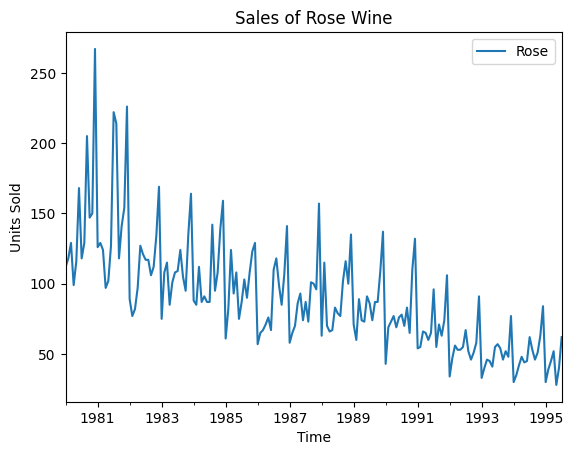

In [10]:
df.plot()
plt.title('Sales of Rose Wine', fontsize=12)
plt.xlabel('Time')
plt.ylabel('Units Sold')
plt.show()

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

`Check basic description`



In [11]:
df.describe().T

count       mean        std   min   25%   50%    75%    max
Rose  187.0  90.042781  39.114366  28.0  62.5  85.0  111.0  267.0

### Yearly Representation 



`Box Plot of Yearly Wine Sales`

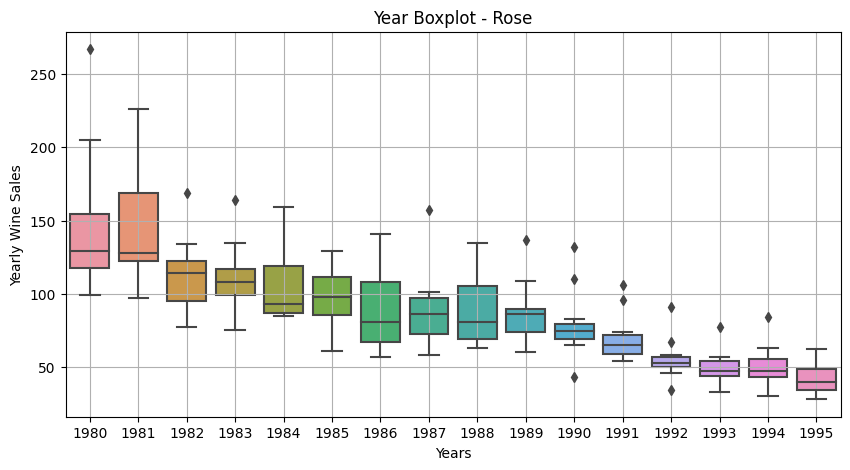

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = df.index.year,y = df.Rose)
plt.title('Year Boxplot - Rose', fontsize=12)
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales')
plt.grid();

### Monthly Representation 



`Box Plot of Monthly Wine Sales`

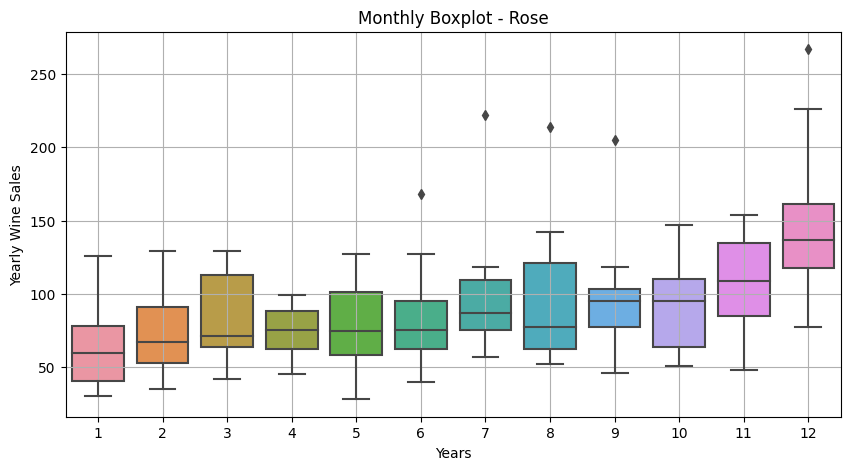

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x = df.index.month,y = df.Rose)
plt.title('Monthly Boxplot - Rose')
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales')
plt.grid();

`Plot a monthplot of the give Time Series`

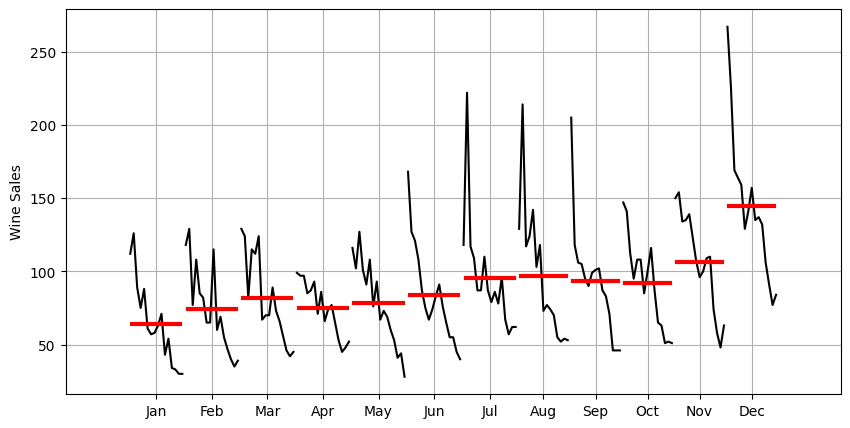

In [14]:
fig, ax = plt.subplots(figsize=(10,5))
month_plot(df,ylabel='Wine Sales',ax=ax)
plt.grid();


`Plot graph of monthly Wine sales across years`

In [15]:
monthly_sales_across_years = pd.pivot_table(pd.DataFrame(df), columns = df.index.month, 
                                                      index = df.index.year)
monthly_sales_across_years

Rose                                                         \
YearMonth     1      2      3     4      5      6      7      8      9    
YearMonth                                                                 
1980       112.0  118.0  129.0  99.0  116.0  168.0  118.0  129.0  205.0   
1981       126.0  129.0  124.0  97.0  102.0  127.0  222.0  214.0  118.0   
1982        89.0   77.0   82.0  97.0  127.0  121.0  117.0  117.0  106.0   
1983        75.0  108.0  115.0  85.0  101.0  108.0  109.0  124.0  105.0   
1984        88.0   85.0  112.0  87.0   91.0   87.0   87.0  142.0   95.0   
1985        61.0   82.0  124.0  93.0  108.0   75.0   87.0  103.0   90.0   
1986        57.0   65.0   67.0  71.0   76.0   67.0  110.0  118.0   99.0   
1987        58.0   65.0   70.0  86.0   93.0   74.0   87.0   73.0  101.0   
1988        63.0  115.0   70.0  66.0   67.0   83.0   79.0   77.0  102.0   
1989        71.0   60.0   89.0  74.0   73.0   91.0   86.0   74.0   87.0   
1990        43.0   69.0   73.0  77.0   69.0   76.0   78.0   70.0   83.0   
1991        54.0   55.0   66.0  65.0   60.0   65.0   96.0   55.0   71.0   
1992        34.0   47.0   56.0  53.0   53.0   55.0   67.0   52.0   46.0   
1993        33.0   40.0   46.0  45.0   41.0   55.0   57.0   54.0   46.0   
1994        30.0   35.0   42.0  48.0   44.0   45.0   62.0   53.0   46.0   
1995        30.0   39.0   45.0  52.0   28.0   40.0   62.0    NaN    NaN   

                                
YearMonth     10     11     12  
YearMonth                       
1980       147.0  150.0  267.0  
1981       141.0  154.0  226.0  
1982       112.0  134.0  169.0  
1983        95.0  135.0  164.0  
1984       108.0  139.0  159.0  
1985       108.0  123.0  129.0  
1986        85.0  107.0  141.0  
1987       100.0   96.0  157.0  
1988       116.0  100.0  135.0  
1989        87.0  109.0  137.0  
1990        65.0  110.0  132.0  
1991        63.0   74.0  106.0  
1992        51.0   58.0   91.0  
1993        52.0   48.0   77.0  
1994        51.0   63.0   84.0  
1995         NaN    NaN    NaN

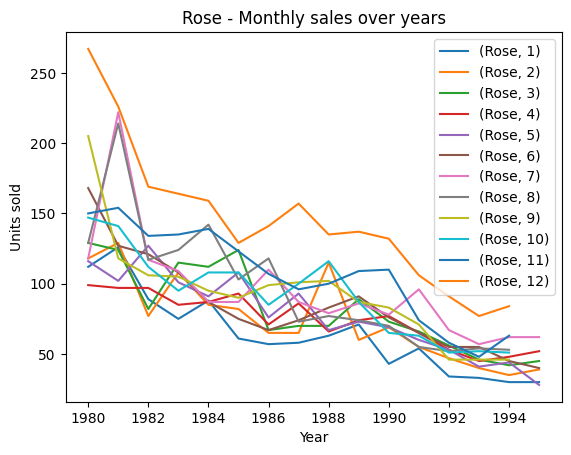

In [16]:
monthly_sales_across_years.plot()
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Year')
plt.title('Rose - Monthly sales over years')
plt.show()

### Decomposition

`Additive Decomposition`

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
df_add_decomp=seasonal_decompose(df,model='additive')

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

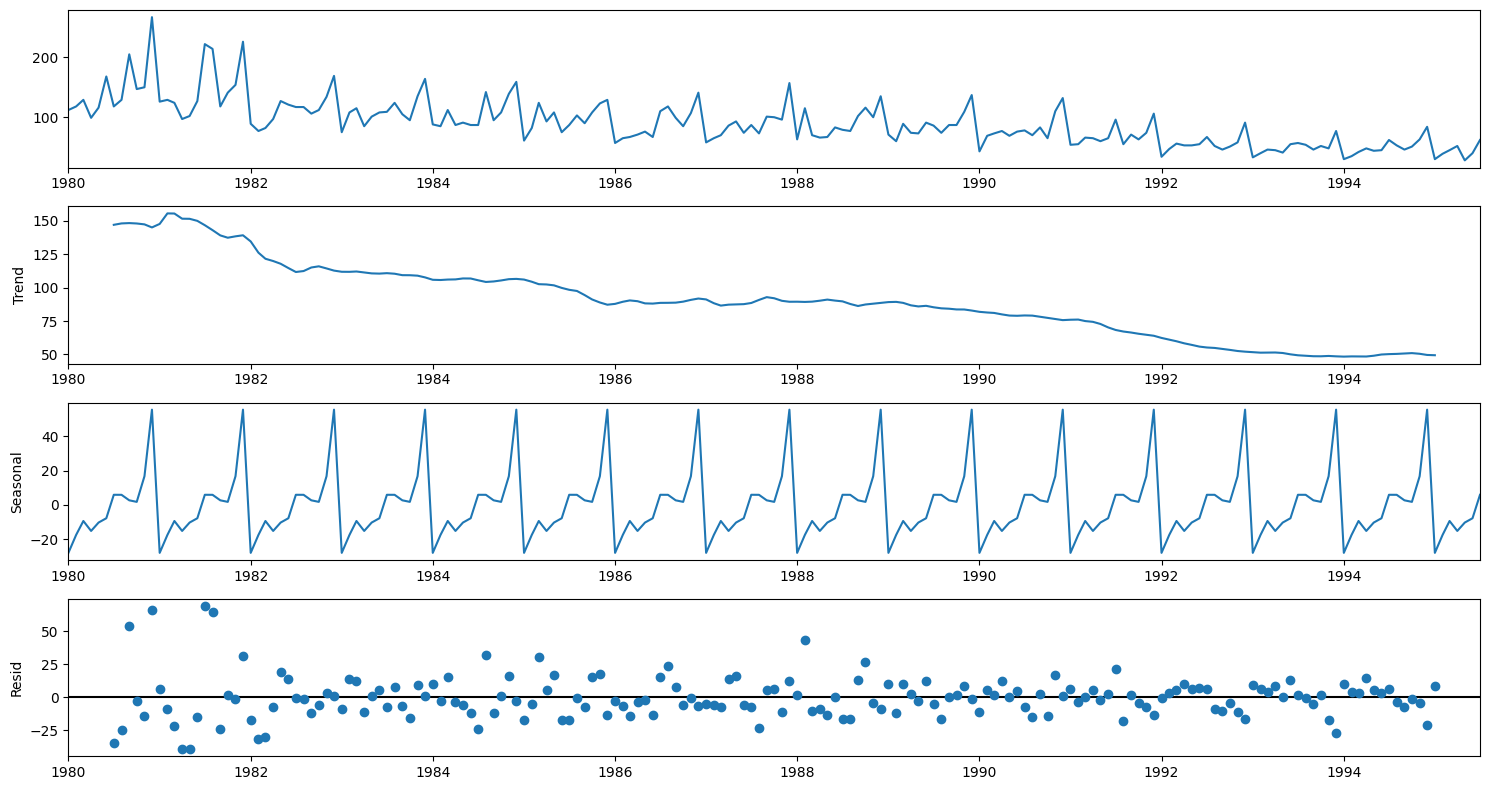

In [20]:
df_add_decomp.plot();

In [21]:
df_add_decomp_compenents=pd.concat([df_add_decomp.trend,df_add_decomp.seasonal,df_add_decomp.resid],axis=1)
df_add_decomp_compenents[0:23].round(3)

trend  seasonal   resid
YearMonth                            
1980-01-01      NaN   -28.040     NaN
1980-02-01      NaN   -17.555     NaN
1980-03-01      NaN    -9.427     NaN
1980-04-01      NaN   -15.239     NaN
1980-05-01      NaN   -10.337     NaN
1980-06-01      NaN    -7.819     NaN
1980-07-01  147.083     5.877 -34.960
1980-08-01  148.125     5.857 -24.982
1980-09-01  148.375     2.644  53.981
1980-10-01  148.083     1.741  -2.824
1980-11-01  147.417    16.716 -14.132
1980-12-01  145.125    55.582  66.293
1981-01-01  147.750   -28.040   6.290
1981-02-01  155.625   -17.555  -9.070
1981-03-01  155.542    -9.427 -22.115
1981-04-01  151.667   -15.239 -39.428
1981-05-01  151.583   -10.337 -39.246
1981-06-01  150.042    -7.819 -15.222
1981-07-01  146.792     5.877  69.331
1981-08-01  143.083     5.857  65.059
1981-09-01  139.167     2.644 -23.810
1981-10-01  137.417     1.741   1.843
1981-11-01  138.458    16.716  -1.174

`Multiplicative Decomposition`

In [22]:
df_mult_decomp=seasonal_decompose(df,model='multiplicative',period=12)

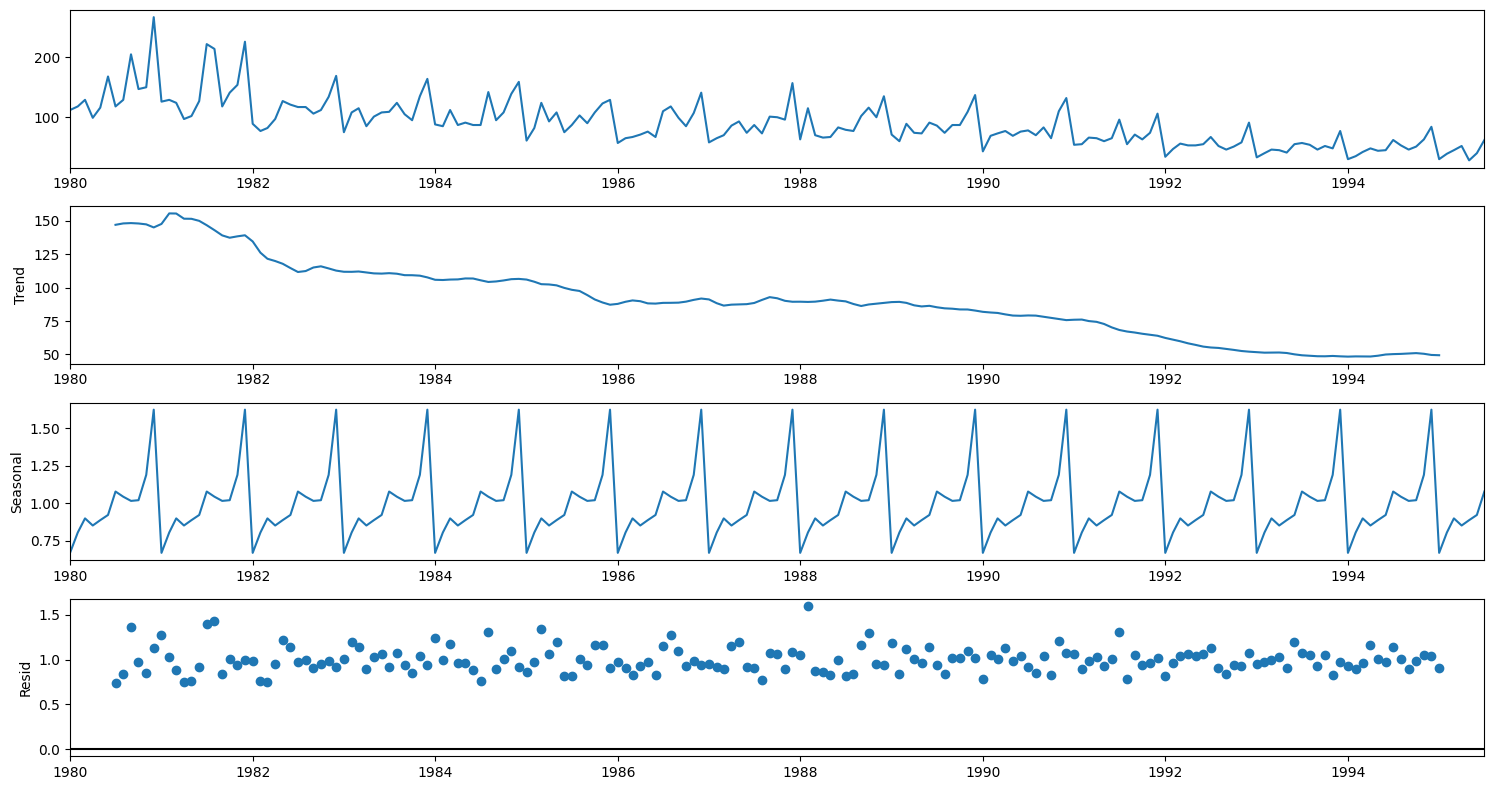

In [23]:
df_mult_decomp.plot();

In [24]:
df_mult_decomp_compenents=pd.concat([df_mult_decomp.trend,df_mult_decomp.seasonal,df_mult_decomp.resid],axis=1)
df_mult_decomp_compenents[0:23].round(3)

trend  seasonal  resid
YearMonth                           
1980-01-01      NaN     0.668    NaN
1980-02-01      NaN     0.804    NaN
1980-03-01      NaN     0.899    NaN
1980-04-01      NaN     0.851    NaN
1980-05-01      NaN     0.887    NaN
1980-06-01      NaN     0.921    NaN
1980-07-01  147.083     1.078  0.744
1980-08-01  148.125     1.043  0.835
1980-09-01  148.375     1.015  1.361
1980-10-01  148.083     1.020  0.973
1980-11-01  147.417     1.189  0.856
1980-12-01  145.125     1.624  1.133
1981-01-01  147.750     0.668  1.276
1981-02-01  155.625     0.804  1.030
1981-03-01  155.542     0.899  0.887
1981-04-01  151.667     0.851  0.751
1981-05-01  151.583     0.887  0.759
1981-06-01  150.042     0.921  0.919
1981-07-01  146.792     1.078  1.403
1981-08-01  143.083     1.043  1.434
1981-09-01  139.167     1.015  0.835
1981-10-01  137.417     1.020  1.006
1981-11-01  138.458     1.189  0.935

## 3. Split the data into training and test. The test data should start in 1991.

In [25]:
df_train=df[df.index<'1991']
df_test=df[df.index>='1991']

In [26]:
print(df_train.shape)
print(df_test.shape)

(132, 1)
(55, 1)


In [27]:
print('First few rows of Training Data','\n',df_train.head(),'\n')
print('Last few rows of Training Data','\n',df_train.tail(),'\n')
print('First few rows of Test Data','\n',df_test.head(),'\n')
print('Last few rows of Test Data','\n',df_test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 

First few rows of Test Data 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



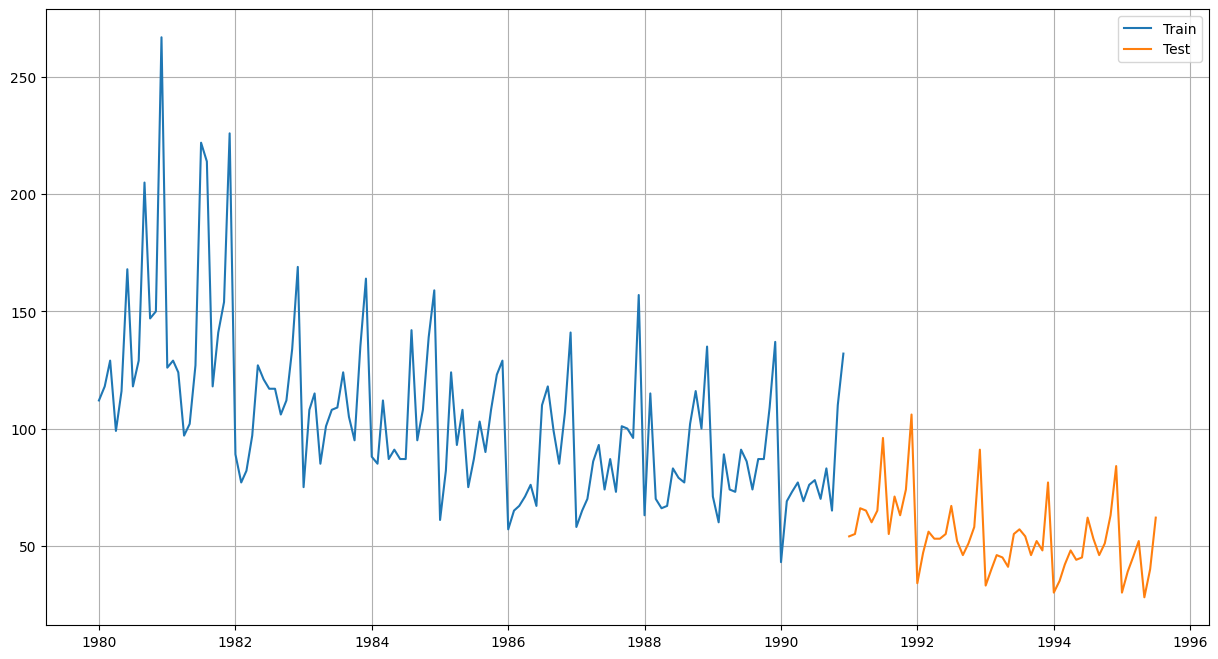

In [28]:
plt.plot( df_train.Rose, label='Train');
plt.plot(df_test.Rose, label='Test');
plt.legend(loc='best');
plt.grid();

## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [29]:
time_train = [i+1 for i in range(len(df_train))]
time_test = [i+133 for i in range(len(df_test))]
print('Training Time','\n',time_train)
print('Test Time','\n',time_test)

Training Time 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [30]:
df_train['time'] = time_train
df_test['time'] = time_test

In [31]:
display(df_train.head())
print('First Few Rows of Train Data')

display(df_train.tail())
print('Last Few Rows of Train Data')

Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

First Few Rows of Train Data


Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132

Last Few Rows of Train Data


In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df_train[['time']],df_train.Rose)
df_test['forecast_lr'] = lr.predict(df_test[['time']])
df_test[['Rose','forecast_lr']].head().round(3)

Rose  forecast_lr
YearMonth                    
1991-01-01  54.0       72.063
1991-02-01  55.0       71.569
1991-03-01  66.0       71.075
1991-04-01  65.0       70.580
1991-05-01  60.0       70.086

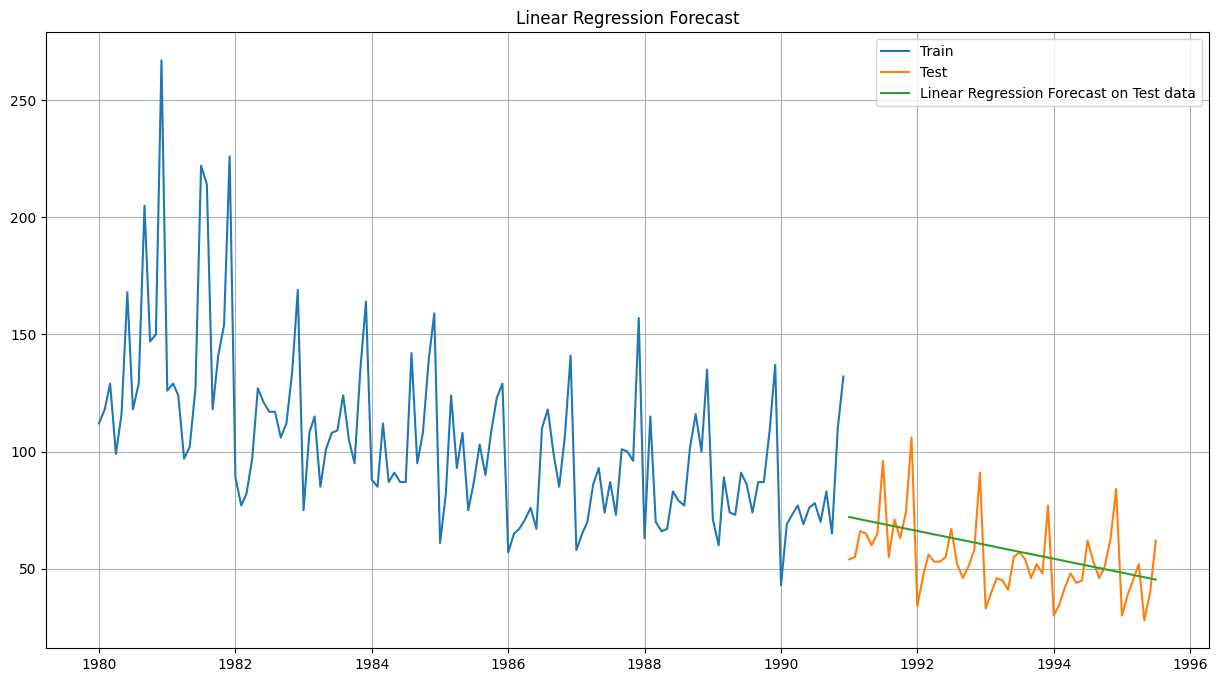

In [33]:
plt.plot( df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_lr, label='Linear Regression Forecast on Test data')
plt.legend(loc='best')
plt.grid();
plt.title('Linear Regression Forecast');

`Model Evaluation`

In [34]:
rmse_lr = mean_squared_error(df_test.Rose,df_test.forecast_lr,squared=False)
rmse_lr

15.303047177325064

In [132]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_lr]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  15.303047

### Model 2: Naive Approach

In [35]:
df_test['forecast_naive'] = df_train['Rose'][-1]
df_test[['Rose','forecast_naive']].head()

Rose  forecast_naive
YearMonth                       
1991-01-01  54.0           132.0
1991-02-01  55.0           132.0
1991-03-01  66.0           132.0
1991-04-01  65.0           132.0
1991-05-01  60.0           132.0

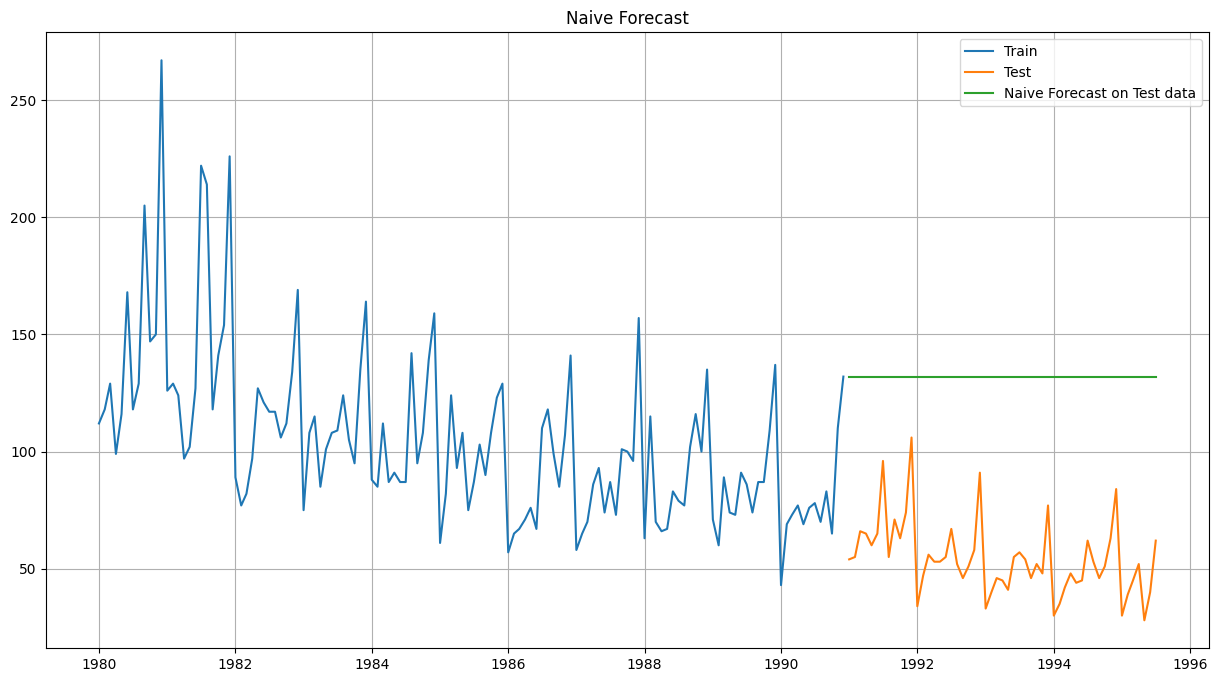

In [36]:
plt.plot( df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_naive, label='Naive Forecast on Test data')
plt.legend(loc='best')
plt.grid();
plt.title('Naive Forecast');

`Model Evaluation`

In [37]:
rmse_naive = mean_squared_error(df_test.Rose,df_test.forecast_naive,squared=False)
rmse_naive

79.28154663201038

In [133]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_naive]},index=['Naive Forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression  15.303047
Naive Forecast     79.281547

### Model 3: Simple Average

In [38]:
df_test['forecast_sa'] = df_train.Rose.mean()
df_test[['Rose','forecast_sa']].head().round(3)

Rose  forecast_sa
YearMonth                    
1991-01-01  54.0      104.939
1991-02-01  55.0      104.939
1991-03-01  66.0      104.939
1991-04-01  65.0      104.939
1991-05-01  60.0      104.939

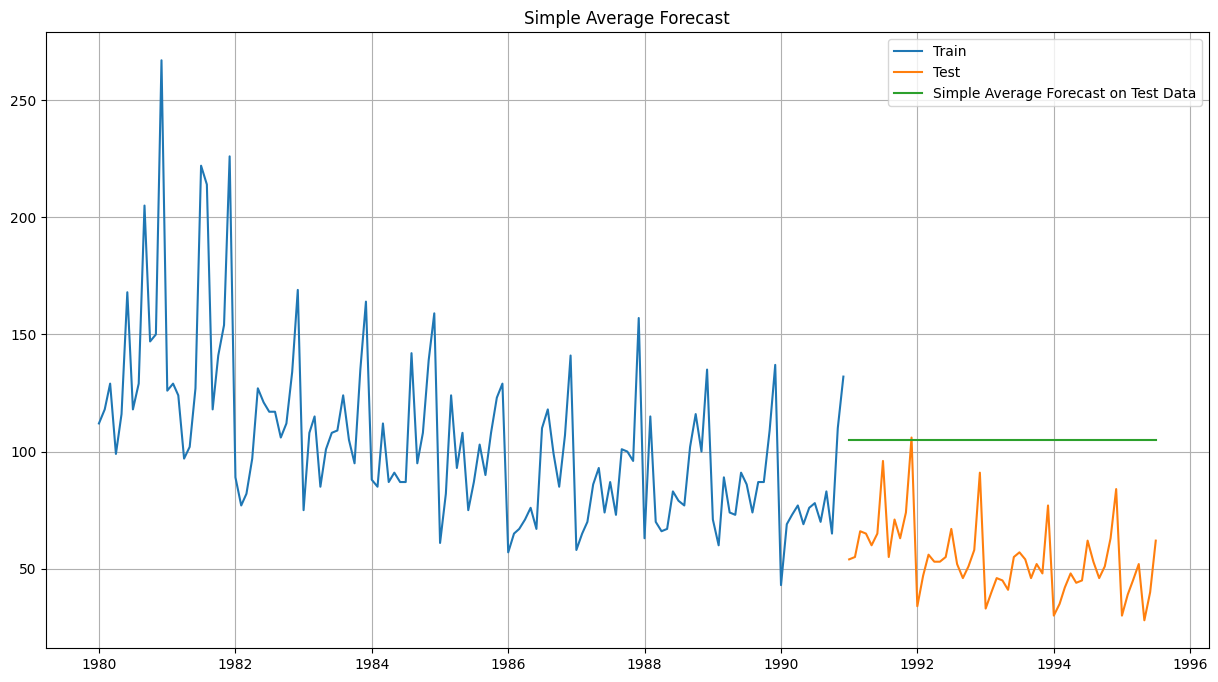

In [39]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_sa, label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

`Model Evaluation`

In [40]:
rmse_sa = mean_squared_error(df_test.Rose,df_test.forecast_sa,squared=False)
rmse_sa

53.02951860891705

In [134]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_sa]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression  15.303047
Naive Forecast     79.281547
Simple Average     53.029519

### Model 4: Simple Exponential Smoothing

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
ses_optimized=SimpleExpSmoothing(df_train.Rose,initialization_method='estimated').fit(optimized=True)
ses_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name       param  optimized
smoothing_level  alpha    0.098749       True
initial_level      l.0  134.387107       True

In [42]:
df_test['forecast_ses_optimized'] = ses_optimized.forecast(steps=len(df_test))
df_test[['Rose','forecast_ses_optimized']].head().round(3)

Rose  forecast_ses_optimized
YearMonth                               
1991-01-01  54.0                  87.105
1991-02-01  55.0                  87.105
1991-03-01  66.0                  87.105
1991-04-01  65.0                  87.105
1991-05-01  60.0                  87.105

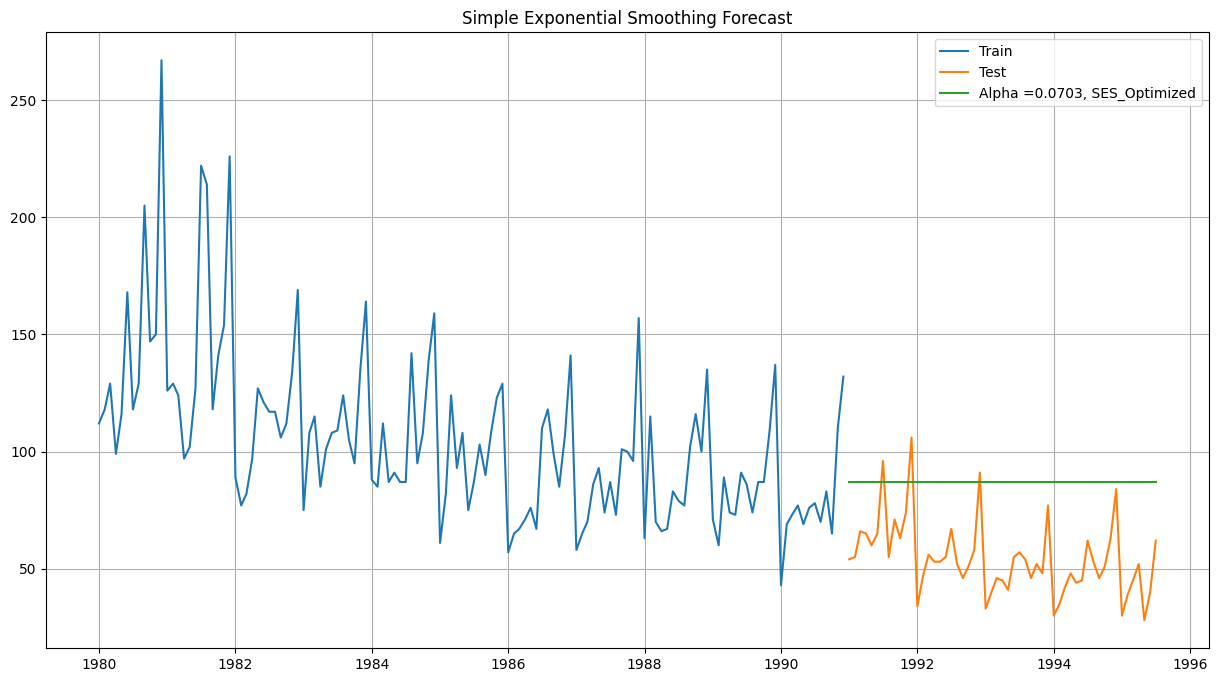

In [43]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_ses_optimized, label='Alpha =0.0703, SES_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Simple Exponential Smoothing Forecast');

`Model Evaluation`

In [44]:
rmse_ses_optimized = mean_squared_error(df_test.Rose,df_test.forecast_ses_optimized,squared=False)
rmse_ses_optimized

36.38164479192902

In [135]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_ses_optimized]},index=['Simple Exponential Smoothing Forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf


Test RMSE
Linear Regression                      15.303047
Naive Forecast                         79.281547
Simple Average                         53.029519
Simple Exponential Smoothing Forecast  36.381645

`Optimizing Alpha based on Test RMSE`

In [45]:
results_ses = pd.DataFrame({'Alpha_Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_ses 

for i in np.arange(0.1,1.1,0.1):
    ses_iteration=SimpleExpSmoothing(df_train.Rose,initialization_method='estimated').fit(smoothing_level=i,optimized=False,use_brute=True)
    rmse_train = mean_squared_error(df_train.Rose,ses_iteration.fittedvalues,squared=False)
    rmse_test = mean_squared_error(df_test.Rose,ses_iteration.forecast(steps=len(df_test)),squared=False)
    results_ses=results_ses.append({'Alpha_Values':i,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_ses

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values  RMSE_Train  RMSE_Test
0           0.1   32.253385  36.413383
1           0.2   32.155991  40.940330
2           0.3   32.559312  47.077358
3           0.4   33.089422  53.336208
4           0.5   33.721164  59.208294
5           0.6   34.470951  64.536345
6           0.7   35.347613  69.262271
7           0.8   36.354969  73.337467
8           0.9   37.500023  76.702326
9           1.0   38.798636  79.281547

In [46]:
results_ses.sort_values(by='RMSE_Test').head().round(3)

Alpha_Values  RMSE_Train  RMSE_Test
0           0.1      32.253     36.413
1           0.2      32.156     40.940
2           0.3      32.559     47.077
3           0.4      33.089     53.336
4           0.5      33.721     59.208

`Best SES Model`

In [47]:
ses= SimpleExpSmoothing(df_train.Rose,initialization_method='estimated').fit(smoothing_level=0.1,optimized=False,use_brute=True)
ses.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name      param  optimized
smoothing_level  alpha   0.100000      False
initial_level      l.0  99.666667      False

In [48]:
df_test['forecast_ses'] = ses.forecast(steps=len(df_test))
df_test[['Rose','forecast_ses_optimized','forecast_ses']].head().round(3)

Rose  forecast_ses_optimized  forecast_ses
YearMonth                                             
1991-01-01  54.0                  87.105         87.14
1991-02-01  55.0                  87.105         87.14
1991-03-01  66.0                  87.105         87.14
1991-04-01  65.0                  87.105         87.14
1991-05-01  60.0                  87.105         87.14

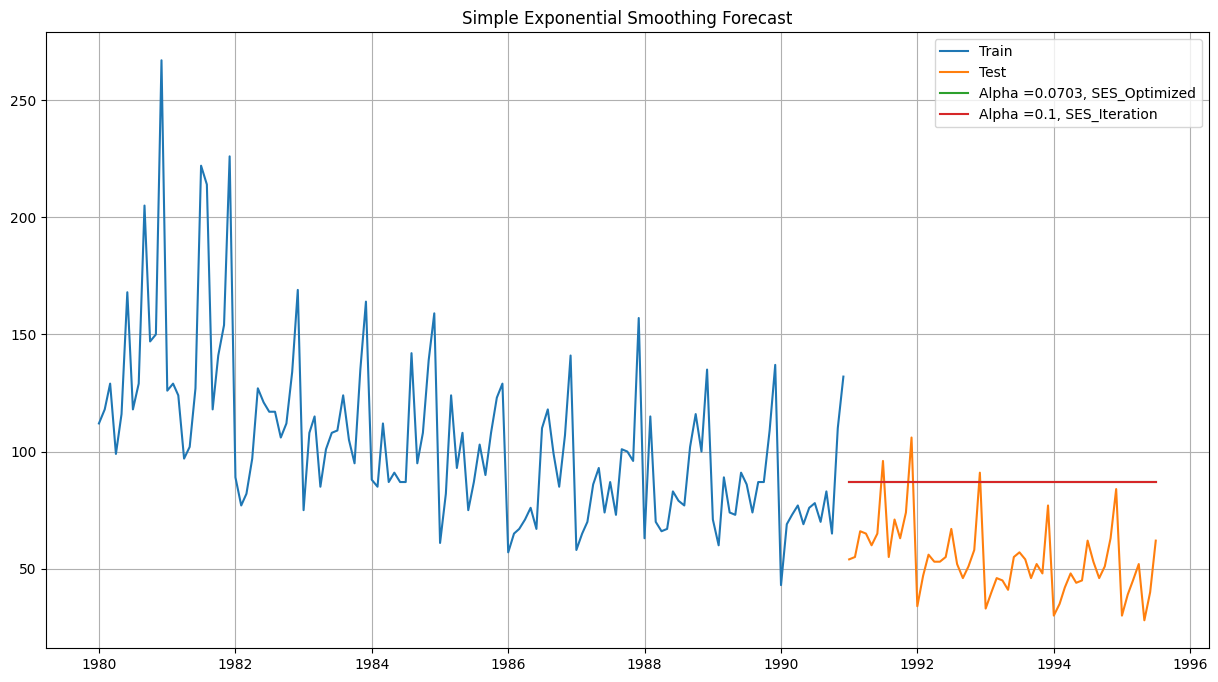

In [49]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_ses_optimized, label='Alpha =forecast_ses_optimized')
plt.plot(df_test.forecast_ses, label='Alpha =0.1, SES_Iteration')
plt.legend(loc='best')
plt.grid();
plt.title('Simple Exponential Smoothing Forecast');

`Model Evaluation`

In [50]:
rmse_ses = mean_squared_error(df_test.Rose,df_test.forecast_ses,squared=False)
rmse_ses

36.4133830948213

In [136]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_ses]},index=['Simple Exponential Smoothing Forecast with alpha =0.1'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383

### Model 5: Double Exponential Smoothing

In [51]:
des_optimized = Holt(df_train.Rose,initialization_method='estimated').fit(optimized=True)
des_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name         param  optimized
smoothing_level  alpha  1.490116e-08       True
smoothing_trend   beta  5.448170e-09       True
initial_level      l.0  1.378176e+02       True
initial_trend      b.0 -4.943507e-01       True

In [52]:
df_test['forecast_des_optimized'] = des_optimized.forecast(steps=len(df_test))
df_test[['Rose','forecast_des_optimized']].head().round(3)

Rose  forecast_des_optimized
YearMonth                               
1991-01-01  54.0                  72.069
1991-02-01  55.0                  71.575
1991-03-01  66.0                  71.080
1991-04-01  65.0                  70.586
1991-05-01  60.0                  70.092

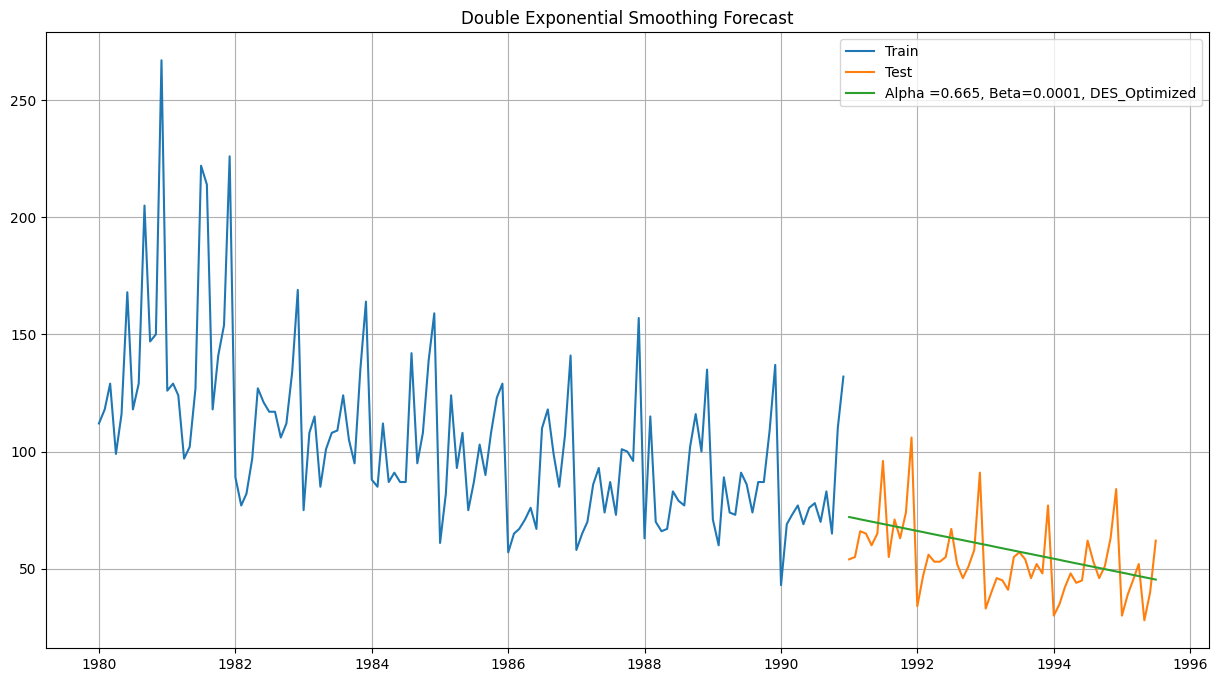

In [53]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_des_optimized, label='Alpha =0.665, Beta=0.0001, DES_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Forecast');

`Model Evaluation`

In [54]:
rmse_des_optimized = mean_squared_error(df_test.Rose,df_test.forecast_des_optimized,squared=False)
rmse_des_optimized

15.304860223312103

In [137]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_des_optimized]},index=['Double Exponential Smoothing Forecast'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383
Double Exponential Smoothing Forecast               15.304860

`Optimizing Alpha and Beta based on Test RMSE`

In [55]:
results_des = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'RMSE_Train':[],'RMSE_Test': []})

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        des_iteration=Holt(df_train.Rose,initialization_method='estimated').fit(smoothing_level=i,smoothing_trend=j,
                                                                                  optimized=False,use_brute=True)
        rmse_train = mean_squared_error(df_train.Rose,des_iteration.fittedvalues,squared=False)
        rmse_test = mean_squared_error(df_test.Rose,des_iteration.forecast(steps=len(df_test)),squared=False)
        results_des=results_des.append({'Alpha_Values':i, 'Beta Values':j,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_des

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values  Beta Values  RMSE_Train   RMSE_Test
0            0.1          0.1   35.120545   36.449278
1            0.1          0.2   33.990798   48.144702
2            0.1          0.3   33.518388   77.591204
3            0.1          0.4   33.495355   99.108207
4            0.1          0.5   33.819101  123.623200
..           ...          ...         ...         ...
95           1.0          0.6   51.833717  801.102238
96           1.0          0.7   54.498417  841.314130
97           1.0          0.8   57.366477  853.386964
98           1.0          0.9   60.474397  834.132572
99           1.0          1.0   63.873750  779.501869

[100 rows x 4 columns]

In [56]:
results_des.sort_values(by='RMSE_Test').head().round(3)

Alpha_Values  Beta Values  RMSE_Train  RMSE_Test
0            0.1          0.1      35.121     36.449
1            0.1          0.2      33.991     48.145
10           0.2          0.1      33.275     65.226
2            0.1          0.3      33.518     77.591
20           0.3          0.1      33.674     98.124

`Final DES Model`

In [138]:
des= Holt(df_train.Rose,initialization_method='estimated').fit(smoothing_level=0.1,smoothing_trend=0.1,
                                                                 optimized=False,use_brute=True)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [139]:
des.params_formatted


name      param  optimized
smoothing_level  alpha   0.100000      False
smoothing_trend   beta   0.100000      False
initial_level      l.0  99.666667      False
initial_trend      b.0   6.260606      False

In [140]:
df_test['forecast_des'] = des.forecast(steps=len(df_test))
df_test[['Rose','forecast_des_optimized','forecast_des']].head().round(3)

Rose  forecast_des_optimized  forecast_des
YearMonth                                             
1991-01-01  54.0                  72.069        83.851
1991-02-01  55.0                  71.575        83.961
1991-03-01  66.0                  71.080        84.070
1991-04-01  65.0                  70.586        84.180
1991-05-01  60.0                  70.092        84.290

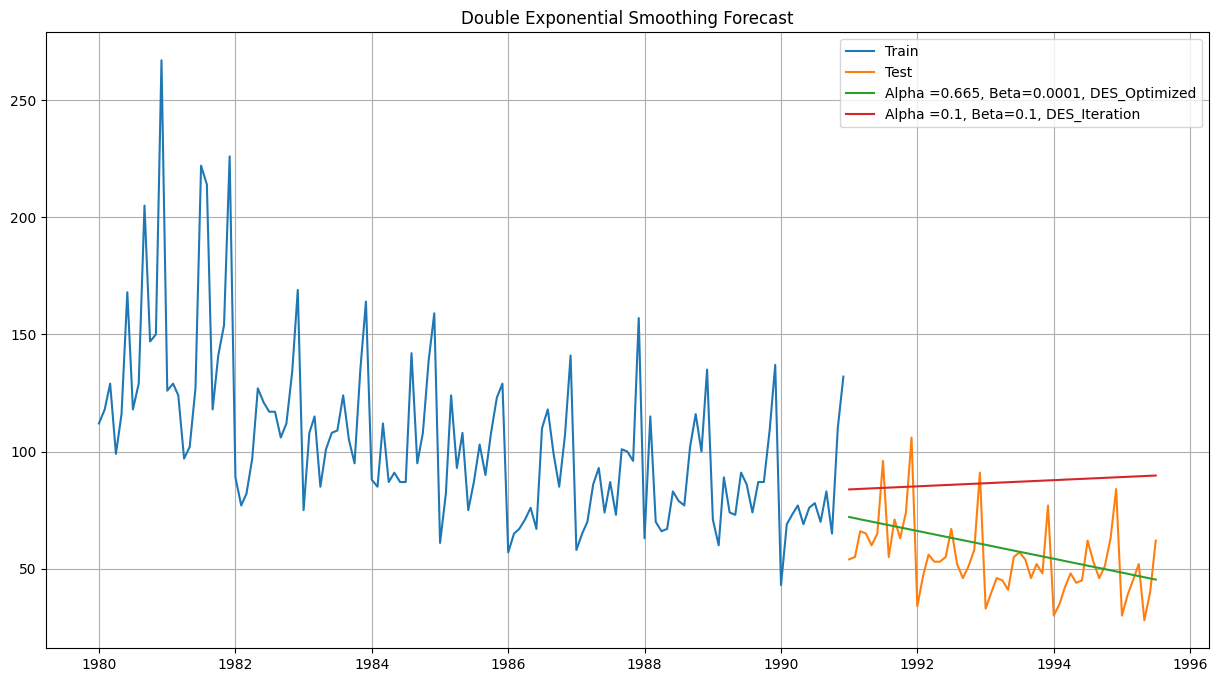

In [141]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_des_optimized, label='Alpha =0.665, Beta=0.0001, DES_Optimized')
plt.plot(df_test.forecast_des, label='Alpha =0.1, Beta=0.1, DES_Iteration')
plt.legend(loc='best')
plt.grid();
plt.title('Double Exponential Smoothing Forecast');

In [60]:
rmse_des = mean_squared_error(df_test.Rose,df_test.forecast_des,squared=False)
rmse_des

36.44927848144102

In [142]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_des]},index=['Double Exponential Smoothing Forecast Alpha =0.665, Beta=0.0001'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383
Double Exponential Smoothing Forecast               15.304860
Double Exponential Smoothing Forecast Alpha =0....  36.449278

### Model 6: Triple Exponential Smoothing with Additive trend & Additive seasonality

In [61]:
tes_add_add_optimized = ExponentialSmoothing(df_train.Rose,trend='additive',seasonal='additive',initialization_method='estimated').fit(optimized=True)
tes_add_add_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name       param  optimized
smoothing_level     alpha    0.084916       True
smoothing_trend      beta    0.000006       True
smoothing_seasonal  gamma    0.000548       True
initial_level         l.0  147.058987       True
initial_trend         b.0   -0.549698       True
initial_seasons.0     s.0  -31.160213       True
initial_seasons.1     s.1  -18.813176       True
initial_seasons.2     s.2  -10.814069       True
initial_seasons.3     s.3  -21.414132       True
initial_seasons.4     s.4  -12.603670       True
initial_seasons.5     s.5   -7.235531       True
initial_seasons.6     s.6    2.767449       True
initial_seasons.7     s.7    8.855481       True
initial_seasons.8     s.8    4.839698       True
initial_seasons.9     s.9    2.951252       True
initial_seasons.10   s.10   21.079349       True
initial_seasons.11   s.11   63.314725       True

In [62]:
df_test['forecast_tes_add_add_optimized'] = tes_add_add_optimized.forecast(steps=len(df_test))
df_test[['Rose','forecast_tes_add_add_optimized']].head().round(3)

Rose  forecast_tes_add_add_optimized
YearMonth                                       
1991-01-01  54.0                          42.575
1991-02-01  55.0                          54.372
1991-03-01  66.0                          61.822
1991-04-01  65.0                          50.672
1991-05-01  60.0                          58.932

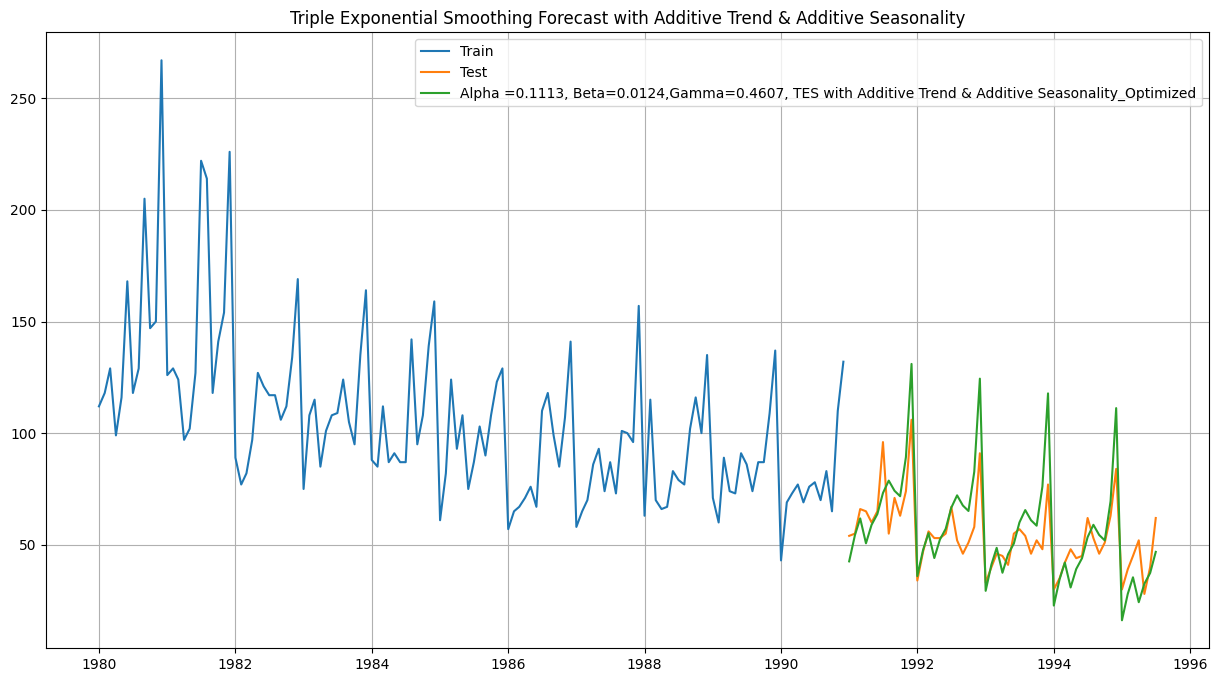

In [63]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_add_add_optimized, 
         label='Alpha =0.1113, Beta=0.0124,Gamma=0.4607, TES with Additive Trend & Additive Seasonality_Optimized')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Additive Seasonality');

In [64]:
rmse_tes_add_add_optimized = mean_squared_error(df_test.Rose,df_test.forecast_tes_add_add_optimized,squared=False)
rmse_tes_add_add_optimized

14.158290954785318

In [143]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_tes_add_add_optimized]},index=['Triple Exponential Smoothing Forecast with Additive Trend & Additive Seasonality'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383
Double Exponential Smoothing Forecast               15.304860
Double Exponential Smoothing Forecast Alpha =0....  36.449278
Triple Exponential Smoothing Forecast with Addi...  14.158291

`Optimizing Alpha, Beta and Gamma based on Test RMSE`

In [65]:
results_tes_add_add = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            tes_add_add_iteration=ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='additive',seasonal='additive').fit(
                smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Rose,tes_add_add_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Rose,tes_add_add_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_add_add=results_tes_add_add.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_add_add


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values  Beta Values  Gamma Values     RMSE_Train     RMSE_Test
0             0.1          0.1           0.1      21.332001  1.463238e+01
1             0.1          0.1           0.2      21.376545  1.329599e+01
2             0.1          0.1           0.3      21.711811  1.331995e+01
3             0.1          0.1           0.4      22.223992  1.365281e+01
4             0.1          0.1           0.5      22.868747  1.405060e+01
..            ...          ...           ...            ...           ...
995           1.0          1.0           0.6    2005.858333  3.397491e+04
996           1.0          1.0           0.7    7447.070502  8.766223e+04
997           1.0          1.0           0.8   25743.870344  8.166530e+05
998           1.0          1.0           0.9   80677.424683  3.575054e+06
999           1.0          1.0           1.0  228894.798212  1.205732e+07

[1000 rows x 5 columns]

In [66]:
results_tes_add_add.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
32           0.1          0.4           0.3        22.7       12.3
22           0.1          0.3           0.3        22.3       12.3
13           0.1          0.2           0.4        22.5       12.3
12           0.1          0.2           0.3        22.0       12.4
23           0.1          0.3           0.4        22.9       12.4

`Final TES Model with Additive trend & Additive seasonality`

In [144]:
tes_add_add= ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='additive',seasonal='additive').fit(
    smoothing_level=0.1,smoothing_trend=0.4,smoothing_seasonal=0.3, optimized=False,use_brute=True)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [68]:
df_test['forecast_tes_add_add'] = tes_add_add.forecast(steps=len(df_test))
df_test[['Rose','forecast_tes_add_add_optimized','forecast_tes_add_add']].head().round(3)

Rose  forecast_tes_add_add_optimized  forecast_tes_add_add
YearMonth                                                             
1991-01-01  54.0                          42.575                43.441
1991-02-01  55.0                          54.372                53.874
1991-03-01  66.0                          61.822                60.097
1991-04-01  65.0                          50.672                48.227
1991-05-01  60.0                          58.932                54.733

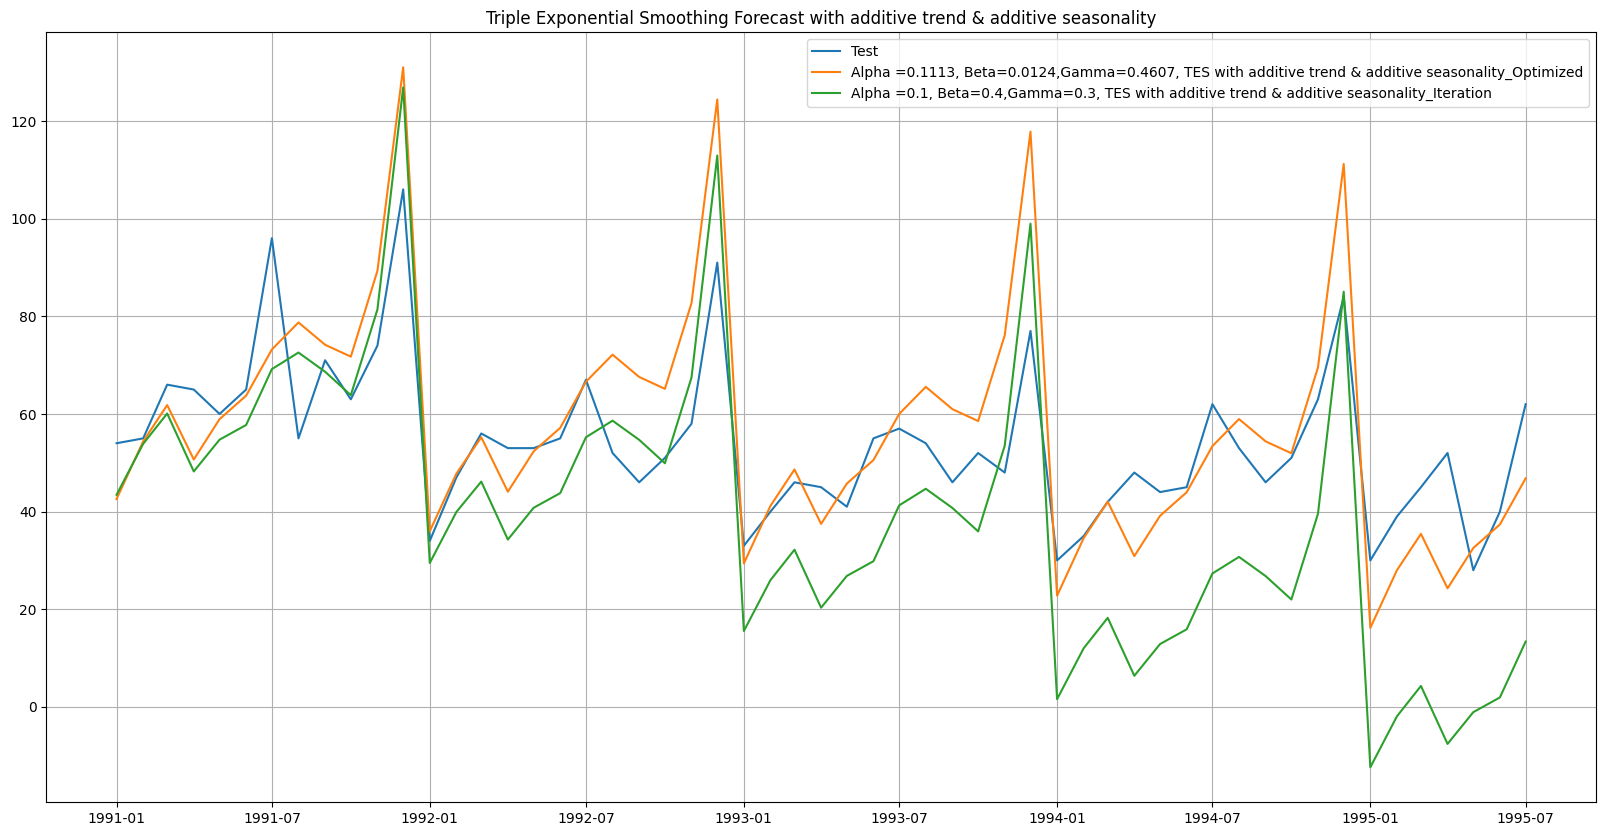

In [145]:
plt.figure(figsize=(20,10))
#plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_add_add_optimized, 
         label='Alpha =0.1113, Beta=0.0124,Gamma=0.4607, TES with additive trend & additive seasonality_Optimized')
plt.plot(df_test.forecast_tes_add_add, 
         label='Alpha =0.1, Beta=0.4,Gamma=0.3, TES with additive trend & additive seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with additive trend & additive seasonality');

In [70]:
rmse_tes_add_add = mean_squared_error(df_test.Rose,df_test.forecast_tes_add_add,squared=False)
rmse_tes_add_add

23.02894074474716

In [146]:
resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_tes_add_add]},index=['Triple Exponential Smoothing Forecast with additive trend & additive seasonality Alpha =0.1, Beta=0.4,Gamma=0.3'])

resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383
Double Exponential Smoothing Forecast               15.304860
Double Exponential Smoothing Forecast Alpha =0....  36.449278
Triple Exponential Smoothing Forecast with Addi...  14.158291
Triple Exponential Smoothing Forecast with addi...  23.028941

### Model 7: Triple Exponential Smoothing with Additive Trend & Multiplicative Seasonality

In [71]:
tes_add_mult_optimized = ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='additive',
                                              seasonal='multiplicative').fit(optimized=True)
tes_add_mult_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name       param  optimized
smoothing_level     alpha    0.077360       True
smoothing_trend      beta    0.039365       True
smoothing_seasonal  gamma    0.000838       True
initial_level         l.0  156.906745       True
initial_trend         b.0   -0.906140       True
initial_seasons.0     s.0    0.714217       True
initial_seasons.1     s.1    0.809824       True
initial_seasons.2     s.2    0.885431       True
initial_seasons.3     s.3    0.773638       True
initial_seasons.4     s.4    0.870463       True
initial_seasons.5     s.5    0.946993       True
initial_seasons.6     s.6    1.041961       True
initial_seasons.7     s.7    1.110127       True
initial_seasons.8     s.8    1.048355       True
initial_seasons.9     s.9    1.027696       True
initial_seasons.10   s.10    1.197836       True
initial_seasons.11   s.11    1.651414       True

In [72]:
df_test['forecast_tes_add_mult_optimized'] = tes_add_mult_optimized.forecast(steps=len(df_test))
df_test[['Rose','forecast_tes_add_mult_optimized']].head().round(3)

Rose  forecast_tes_add_mult_optimized
YearMonth                                        
1991-01-01  54.0                           55.942
1991-02-01  55.0                           63.241
1991-03-01  66.0                           68.900
1991-04-01  65.0                           60.007
1991-05-01  60.0                           67.257

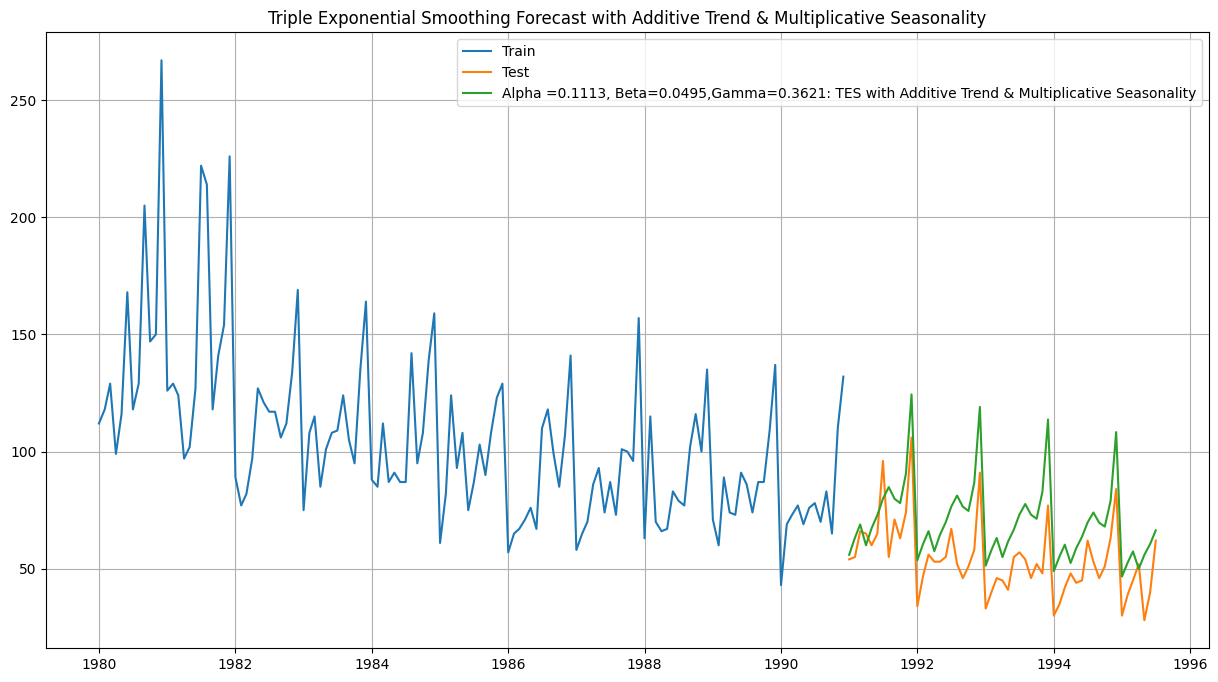

In [73]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_add_mult_optimized, 
         label='Alpha =0.1113, Beta=0.0495,Gamma=0.3621: TES with Additive Trend & Multiplicative Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality');

In [74]:
rmse_tes_add_mult_optimized = mean_squared_error(df_test.Rose,df_test.forecast_tes_add_mult_optimized,squared=False)
rmse_tes_add_mult_optimized

18.681118054382928

In [147]:
resultsDf_10 = pd.DataFrame({'Test RMSE': [rmse_tes_add_mult_optimized]},index=['Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383
Double Exponential Smoothing Forecast               15.304860
Double Exponential Smoothing Forecast Alpha =0....  36.449278
Triple Exponential Smoothing Forecast with Addi...  14.158291
Triple Exponential Smoothing Forecast with addi...  23.028941
Triple Exponential Smoothing Forecast with Addi...  18.681118

`Optimizing Alpha, Beta and Gamma based on Test RMSE`

In [75]:
results_tes_add_mult = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            tes_add_mult_iteration=ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='additive',
            seasonal='multiplicative').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Rose,tes_add_mult_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Rose,tes_add_mult_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_add_mult=results_tes_add_mult.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_add_mult

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values  Beta Values  Gamma Values    RMSE_Train    RMSE_Test
0             0.1          0.1           0.1     19.535124    11.636057
1             0.1          0.1           0.2     20.068055    11.520208
2             0.1          0.1           0.3     20.714821    11.694004
3             0.1          0.1           0.4     21.459373    12.062741
4             0.1          0.1           0.5     22.307144    12.581798
..            ...          ...           ...           ...          ...
995           1.0          1.0           0.6   2140.632923  6630.567014
996           1.0          1.0           0.7   3091.001599  9720.768645
997           1.0          1.0           0.8   2438.212926  2573.886277
998           1.0          1.0           0.9  28835.801098  3522.904467
999           1.0          1.0           1.0   1577.905281  3104.660510

[1000 rows x 5 columns]

In [76]:
results_tes_add_mult.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
10            0.1          0.2           0.1        19.8        9.3
11            0.1          0.2           0.2        20.3        9.6
151           0.2          0.6           0.2        23.1       10.0
12            0.1          0.2           0.3        20.9       10.0
142           0.2          0.5           0.3        23.7       10.3

`Final TES Model with Additive Trend & Multiplicative Seasonality`

In [148]:
tes_add_mult= ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='additive',seasonal='multiplicative').fit(
    smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.1, optimized=False,use_brute=True)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [149]:
df_test['forecast_tes_add_mult'] = tes_add_mult.forecast(steps=len(df_test))
df_test[['Rose','forecast_tes_add_mult_optimized','forecast_tes_add_mult']].head().round(3)

Rose  forecast_tes_add_mult_optimized  forecast_tes_add_mult
YearMonth                                                               
1991-01-01  54.0                           55.942                 52.564
1991-02-01  55.0                           63.241                 61.440
1991-03-01  66.0                           68.900                 66.083
1991-04-01  65.0                           60.007                 59.045
1991-05-01  60.0                           67.257                 63.420

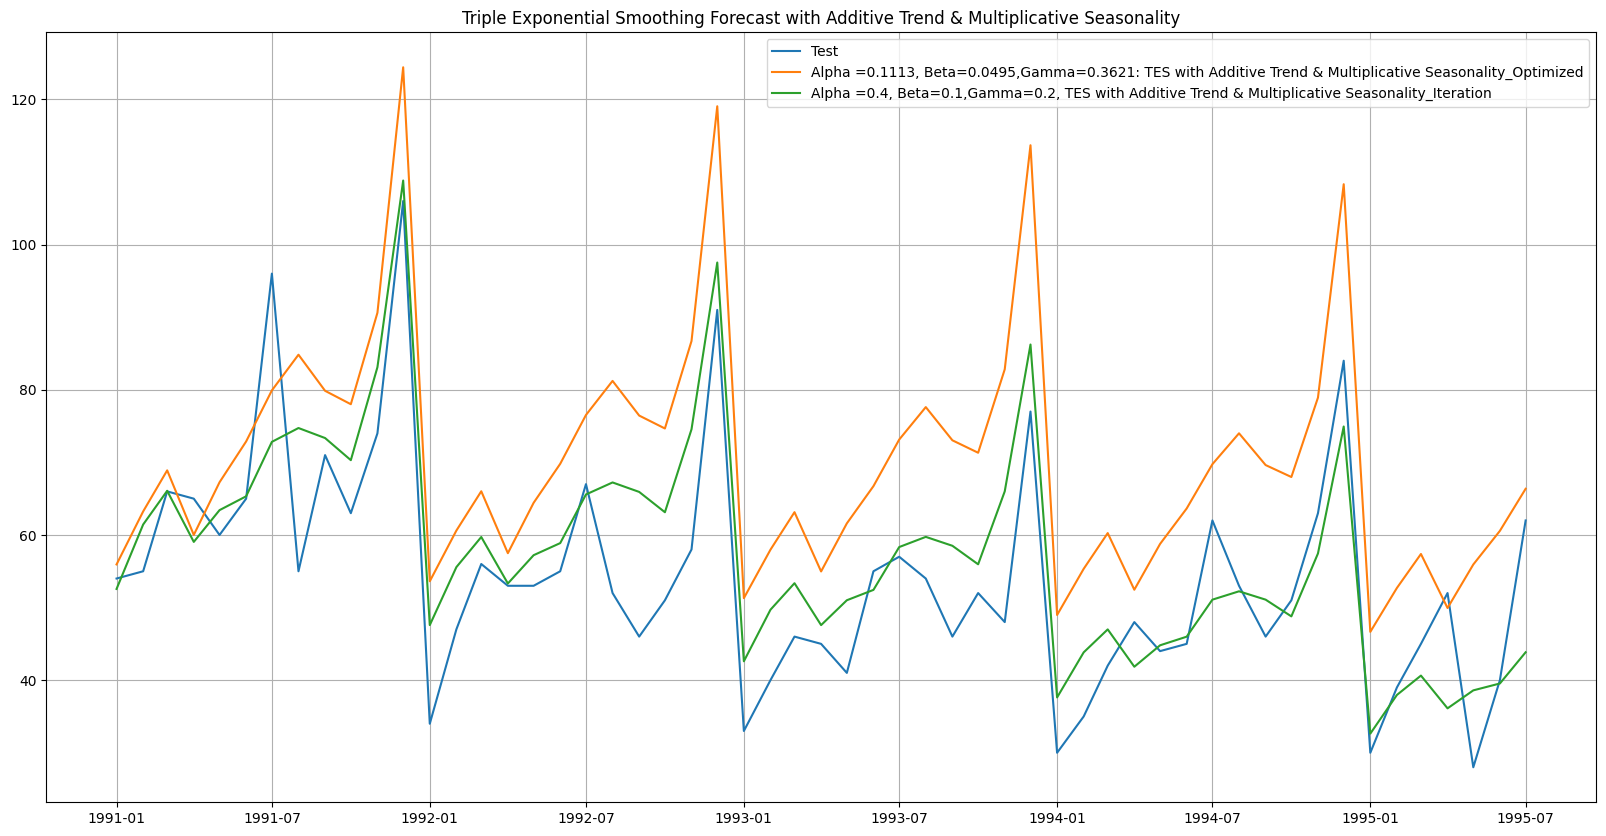

In [150]:
plt.figure(figsize=(20,10))
#plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_add_mult_optimized, 
         label='Alpha =0.1113, Beta=0.0495,Gamma=0.3621: TES with Additive Trend & Multiplicative Seasonality_Optimized')
plt.plot(df_test.forecast_tes_add_mult, 
         label='Alpha =0.4, Beta=0.1,Gamma=0.2, TES with Additive Trend & Multiplicative Seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality');

In [151]:
rmse_tes_add_mult = mean_squared_error(df_test.Rose,df_test.forecast_tes_add_mult,squared=False)
rmse_tes_add_mult

9.26604729065551

In [152]:
resultsDf_11 = pd.DataFrame({'Test RMSE': [rmse_tes_add_mult]},index=['Triple Exponential Smoothing Forecast with Additive Trend & Multiplicative Seasonality  smoothing_level=0.1,smoothing_trend=0.2,smoothing_seasonal=0.1'])

resultsDf = pd.concat([resultsDf, resultsDf_11])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383
Double Exponential Smoothing Forecast               15.304860
Double Exponential Smoothing Forecast Alpha =0....  36.449278
Triple Exponential Smoothing Forecast with Addi...  14.158291
Triple Exponential Smoothing Forecast with addi...  23.028941
Triple Exponential Smoothing Forecast with Addi...  18.681118
Triple Exponential Smoothing Forecast with Addi...   9.266047

### Model 8: Triple Exponential Smoothing with Multiplicative Trend & Multiplicative Seasonality

In [81]:
tes_mult_mult_optimized = ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',
                                              seasonal='multiplicative').fit(optimized=True)
tes_mult_mult_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name       param  optimized
smoothing_level     alpha    0.053528       True
smoothing_trend      beta    0.033268       True
smoothing_seasonal  gamma    0.000011       True
initial_level         l.0  114.211804       True
initial_trend         b.0    0.992363       True
initial_seasons.0     s.0    0.993824       True
initial_seasons.1     s.1    1.127861       True
initial_seasons.2     s.2    1.234947       True
initial_seasons.3     s.3    1.078129       True
initial_seasons.4     s.4    1.213243       True
initial_seasons.5     s.5    1.319453       True
initial_seasons.6     s.6    1.449820       True
initial_seasons.7     s.7    1.545648       True
initial_seasons.8     s.8    1.465387       True
initial_seasons.9     s.9    1.432092       True
initial_seasons.10   s.10    1.672158       True
initial_seasons.11   s.11    2.301901       True

In [82]:
df_test['forecast_tes_mult_mult_optimized'] = tes_mult_mult_optimized.forecast(steps=len(df_test))
df_test[['Rose','forecast_tes_mult_mult_optimized']].head().round(3)

Rose  forecast_tes_mult_mult_optimized
YearMonth                                         
1991-01-01  54.0                            55.754
1991-02-01  55.0                            63.084
1991-03-01  66.0                            68.867
1991-04-01  65.0                            59.942
1991-05-01  60.0                            67.252

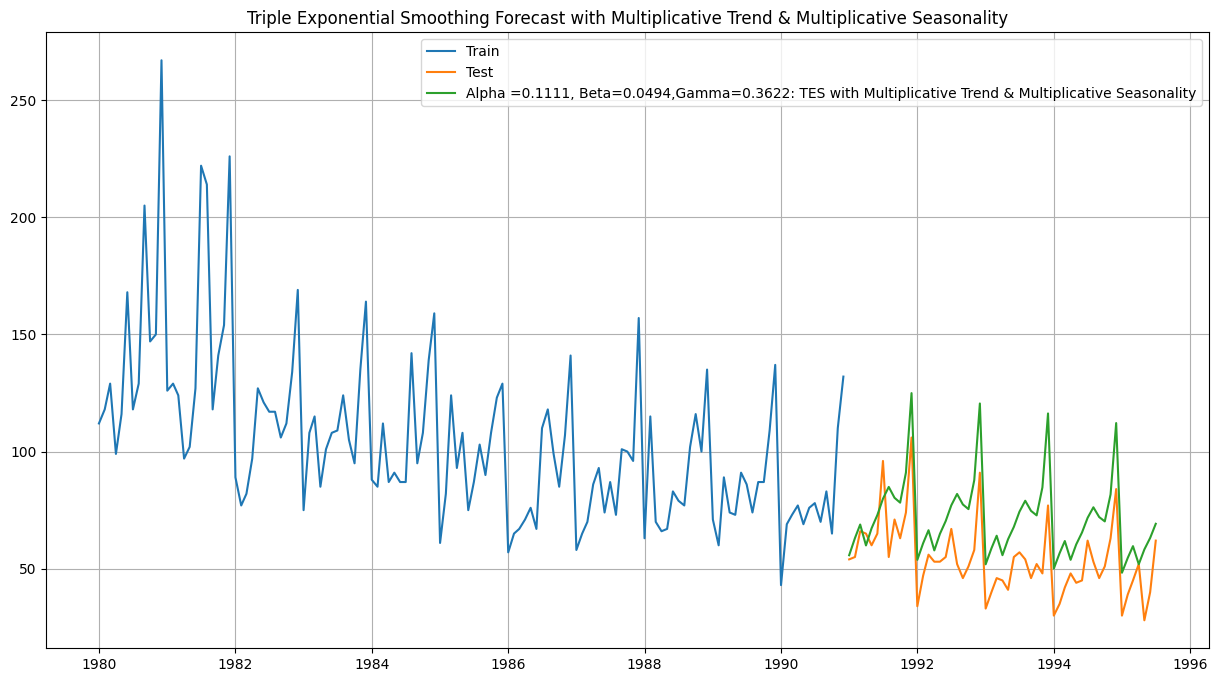

In [83]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_mult_mult_optimized, 
         label='Alpha =0.1111, Beta=0.0494,Gamma=0.3622: TES with Multiplicative Trend & Multiplicative Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality');

In [84]:
rmse_tes_mult_mult_optimized = mean_squared_error(df_test.Rose,df_test.forecast_tes_mult_mult_optimized,squared=False)
rmse_tes_mult_mult_optimized

19.875926117623038

In [173]:
resultsDf_12 = pd.DataFrame({'Test RMSE': [rmse_tes_mult_mult_optimized]},index=['Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality'])

resultsDf = pd.concat([resultsDf, resultsDf_12])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383
Double Exponential Smoothing Forecast               15.304860
Double Exponential Smoothing Forecast Alpha =0....  36.449278
Triple Exponential Smoothing Forecast with Addi...  14.158291
Triple Exponential Smoothing Forecast with addi...  23.028941
Triple Exponential Smoothing Forecast with Addi...  18.681118
Triple Exponential Smoothing Forecast with Addi...   9.266047
Triple Exponential Smoothing Forecast with Mult...  19.875926
Triple Exponential Smoothing Forecast with Mult...  27.221679
Triple Exponential Smoothing Forecast with Mult...  15.639656
forecast_ARIMA_auto                                 36.457106
forecast_SARIMA_auto                                16.673050
Triple Exponential Smoothing Forecast with Mult...  19.875926

`Optimizing Alpha, Beta and Gamma based on Test RMSE`

In [175]:
results_tes_mult_mult = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
results_tes_mult_mult

for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            tes_mult_mult_iteration=ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',
            seasonal='multiplicative').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Rose,tes_mult_mult_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Rose,tes_mult_mult_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_mult_mult=results_tes_mult_mult.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_mult_mult

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values  Beta Values  Gamma Values    RMSE_Train      RMSE_Test
0             0.1          0.1           0.1  1.952408e+01   1.354380e+01
1             0.1          0.1           0.2  2.007419e+01   1.339594e+01
2             0.1          0.1           0.3  2.073699e+01   1.356745e+01
3             0.1          0.1           0.4  2.149759e+01   1.394279e+01
4             0.1          0.1           0.5  2.236207e+01   1.446380e+01
..            ...          ...           ...           ...            ...
724           0.9          0.9           0.5  2.308936e+02   2.169365e+33
725           0.9          0.9           0.6  3.079798e+02   6.022883e+70
726           0.9          0.9           0.7  2.431277e+14   7.050911e+28
727           0.9          0.9           0.8  3.575037e+11  1.220062e+108
728           0.9          0.9           0.9  8.855529e+27   6.383171e+28

[729 rows x 5 columns]

In [176]:
results_tes_mult_mult.sort_values(by='RMSE_Test').head()

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
136           0.2          0.7           0.2   24.042290   9.053203
176           0.3          0.2           0.6   26.940472  10.652112
9             0.1          0.2           0.1   19.647823  10.912264
10            0.1          0.2           0.2   20.172839  11.258336
11            0.1          0.2           0.3   20.828952  11.717807

`Final TES Model with Additive Multiplicative & Multiplicative Seasonality

In [ ]:
tes_mult_mult= ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',seasonal='multiplicative').fit(
    smoothing_level=0.2,smoothing_trend=0.7,smoothing_seasonal=0.2, optimized=False,use_brute=True)

In [177]:
tes_mult_mult.params_formatted

name       param  optimized
smoothing_level     alpha    0.200000      False
smoothing_trend      beta    0.700000      False
smoothing_seasonal  gamma    0.200000      False
initial_level         l.0  145.275000      False
initial_trend         b.0    1.005262      False
initial_seasons.0     s.0    0.755722      False
initial_seasons.1     s.1    0.804174      False
initial_seasons.2     s.2    0.890513      False
initial_seasons.3     s.3    0.759642      False
initial_seasons.4     s.4    0.880678      False
initial_seasons.5     s.5    0.925536      False
initial_seasons.6     s.6    1.089060      False
initial_seasons.7     s.7    1.135386      False
initial_seasons.8     s.8    1.030302      False
initial_seasons.9     s.9    0.965857      False
initial_seasons.10   s.10    1.137884      False
initial_seasons.11   s.11    1.625247      False

In [178]:
df_test['forecast_tes_mult_mult'] = tes_mult_mult.forecast(steps=len(df_test))

In [179]:
df_test[['Rose','forecast_tes_mult_mult_optimized','forecast_tes_mult_mult']].head(10).round(1)

Rose  forecast_tes_mult_mult_optimized  forecast_tes_mult_mult
YearMonth                                                                 
1991-01-01  54.0                              55.8                    49.0
1991-02-01  55.0                              63.1                    60.8
1991-03-01  66.0                              68.9                    64.5
1991-04-01  65.0                              59.9                    59.9
1991-05-01  60.0                              67.3                    60.0
1991-06-01  65.0                              72.9                    61.4
1991-07-01  96.0                              79.9                    66.4
1991-08-01  55.0                              84.9                    66.0
1991-09-01  71.0                              80.3                    72.7
1991-10-01  63.0                              78.2                    70.9

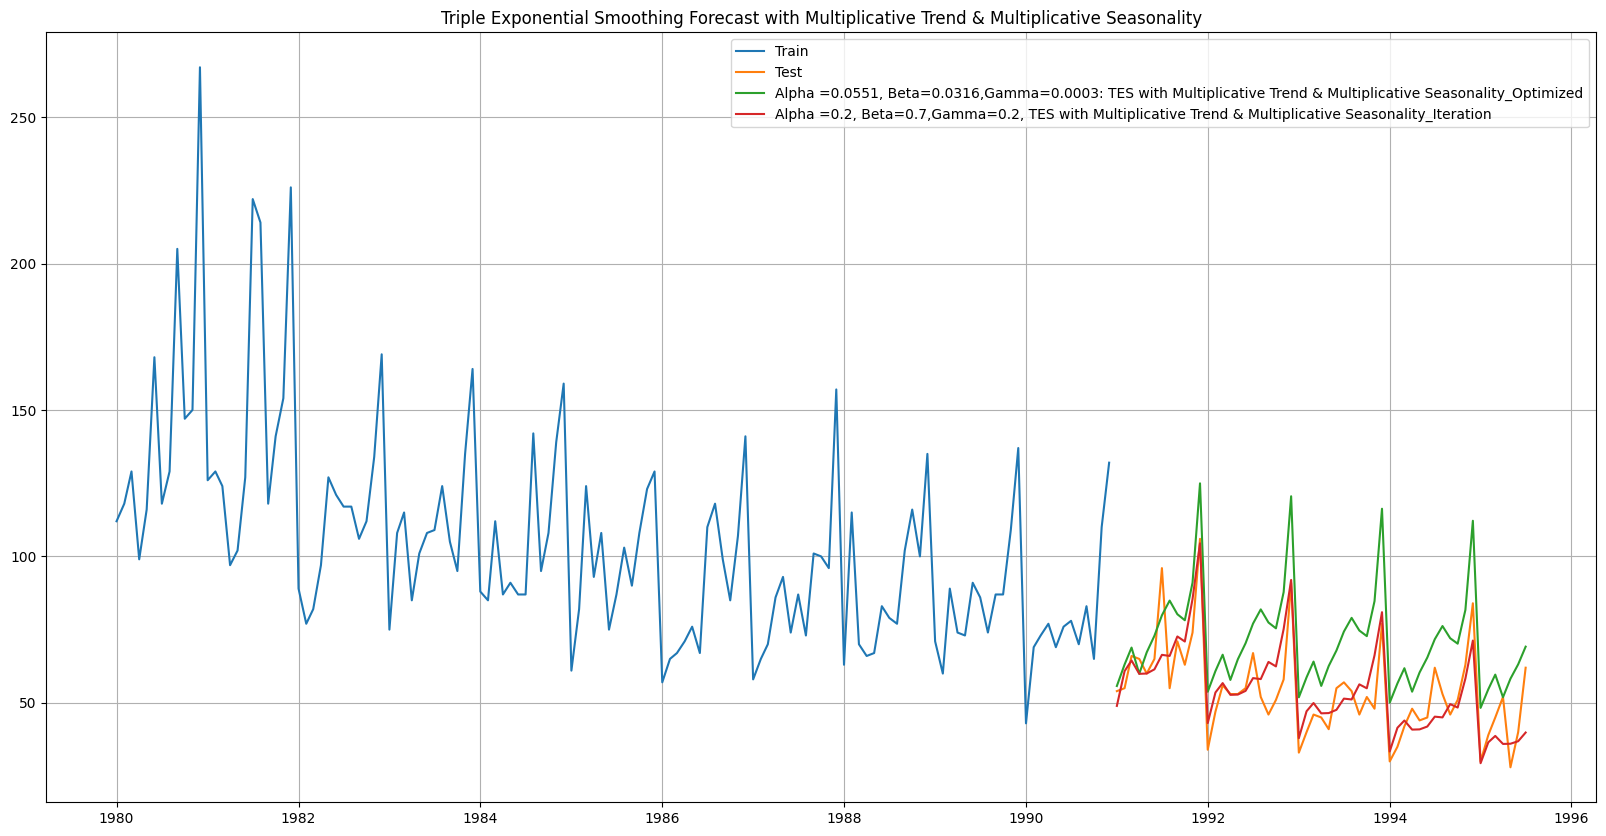

In [180]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_mult_mult_optimized, 
         label='Alpha =0.0551, Beta=0.0316,Gamma=0.0003: TES with Multiplicative Trend & Multiplicative Seasonality_Optimized')
plt.plot(df_test.forecast_tes_mult_mult, 
         label='Alpha =0.2, Beta=0.7,Gamma=0.2, TES with Multiplicative Trend & Multiplicative Seasonality_Iteration')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality');

In [181]:
rmse_tes_mult_mult = mean_squared_error(df_test.Rose,df_test.forecast_tes_mult_mult,squared=False)
rmse_tes_mult_mult

9.053203182678818

In [182]:
resultsDf_13 = pd.DataFrame({'Test RMSE': [rmse_tes_mult_mult]},index=['Triple Exponential Smoothing Forecast with Multiplicative Trend & Multiplicative Seasonality Alpha =0.2, Beta=0.7,Gamma=0.2'])

resultsDf = pd.concat([resultsDf, resultsDf_13])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383
Double Exponential Smoothing Forecast               15.304860
Double Exponential Smoothing Forecast Alpha =0....  36.449278
Triple Exponential Smoothing Forecast with Addi...  14.158291
Triple Exponential Smoothing Forecast with addi...  23.028941
Triple Exponential Smoothing Forecast with Addi...  18.681118
Triple Exponential Smoothing Forecast with Addi...   9.266047
Triple Exponential Smoothing Forecast with Mult...  19.875926
Triple Exponential Smoothing Forecast with Mult...  27.221679
Triple Exponential Smoothing Forecast with Mult...  15.639656
forecast_ARIMA_auto                                 36.457106
forecast_SARIMA_auto                                16.673050
Triple Exponential Smoothing Forecast with Mult...  19.875926
Triple Exponential Smoothing Forecast with Mult...   9.053203

### Model 9: Triple Exponential Smoothing with Multiplicative Trend & Additive Seasonality

In [91]:
tes_mult_add_optimized = ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',
                                              seasonal='additive').fit(optimized=True)
tes_mult_add_optimized.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name       param  optimized
smoothing_level     alpha    0.146429       True
smoothing_trend      beta    0.053247       True
smoothing_seasonal  gamma    0.131319       True
initial_level         l.0  145.275000       True
initial_trend         b.0    1.005262       True
initial_seasons.0     s.0  -30.484375       True
initial_seasons.1     s.1  -25.046875       True
initial_seasons.2     s.2  -15.536458       True
initial_seasons.3     s.3  -30.734375       True
initial_seasons.4     s.4  -16.463542       True
initial_seasons.5     s.5   -9.723958       True
initial_seasons.6     s.6   12.442708       True
initial_seasons.7     s.7   17.536458       True
initial_seasons.8     s.8    5.557292       True
initial_seasons.9     s.9   -3.890625       True
initial_seasons.10   s.10   15.994792       True
initial_seasons.11   s.11   80.348958       True

In [92]:
df_test['forecast_tes_mult_add_optimized'] = tes_mult_add_optimized.forecast(steps=len(df_test))
df_test[['Rose','forecast_tes_mult_add_optimized']].head().round(3)

Rose  forecast_tes_mult_add_optimized
YearMonth                                        
1991-01-01  54.0                           46.285
1991-02-01  55.0                           58.355
1991-03-01  66.0                           64.361
1991-04-01  65.0                           54.434
1991-05-01  60.0                           60.002

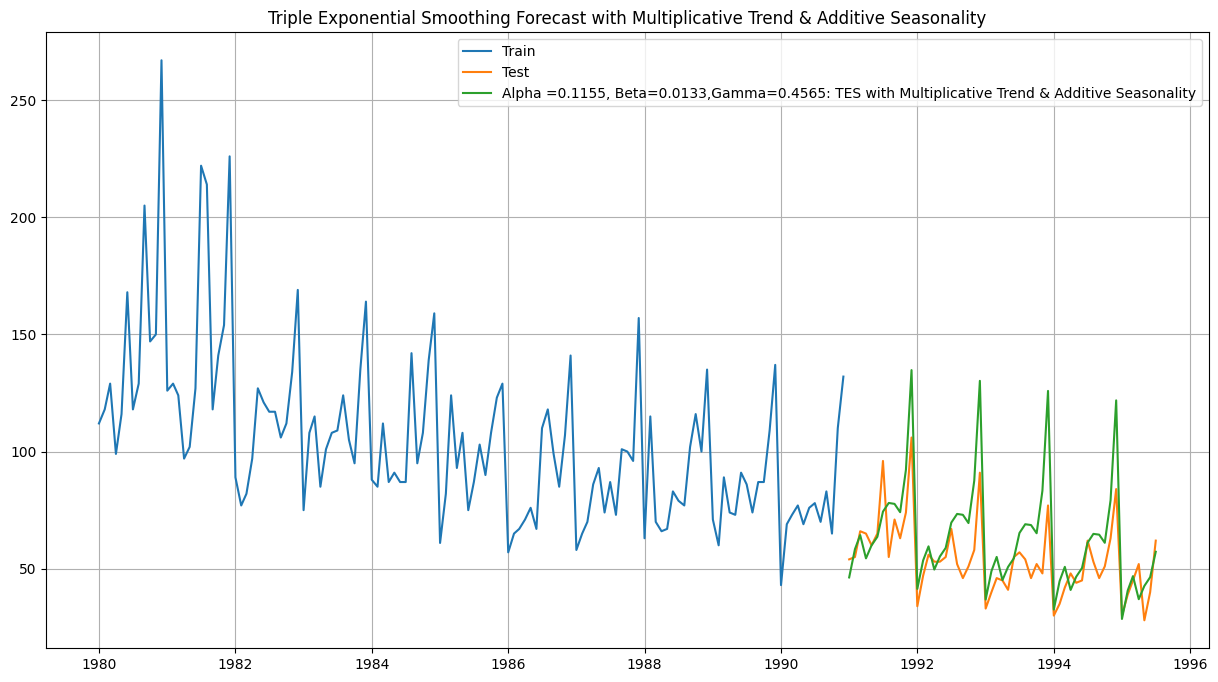

In [93]:
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_tes_mult_add_optimized, 
         label='Alpha =0.1155, Beta=0.0133,Gamma=0.4565: TES with Multiplicative Trend & Additive Seasonality')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality');

In [94]:
rmse_tes_mult_add_optimized = mean_squared_error(df_test.Rose,df_test.forecast_tes_mult_add_optimized,squared=False)
rmse_tes_mult_add_optimized

16.265454204589815

In [ ]:
resultsDf_14 = pd.DataFrame({'Test RMSE': [rmse_tes_mult_add_optimized]},index=['Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality'])

resultsDf = pd.concat([resultsDf, resultsDf_14])
resultsDf


`Optimizing Alpha, Beta and Gamma based on Test RMSE`

In [95]:
results_tes_mult_add = pd.DataFrame({'Alpha_Values':[],'Beta Values':[],'Gamma Values':[],'RMSE_Train':[],'RMSE_Test': []})
for i in np.arange(0.1,1,0.1):
    for j in np.arange(0.1,1,0.1):
        for k in np.arange(0.1,1,0.1):
            tes_mult_add_iteration=ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',
            seasonal='additive').fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            rmse_train = mean_squared_error(df_train.Rose,tes_mult_add_iteration.fittedvalues,squared=False)
            rmse_test = mean_squared_error(df_test.Rose,tes_mult_add_iteration.forecast(steps=len(df_test)),squared=False)
            results_tes_mult_add=results_tes_mult_add.append({'Alpha_Values':i, 'Beta Values':j,'Gamma Values':k,'RMSE_Train':rmse_train 
                                      ,'RMSE_Test':rmse_test}, ignore_index=True)
results_tes_mult_add

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

Alpha_Values  Beta Values  Gamma Values    RMSE_Train      RMSE_Test
0             0.1          0.1           0.1  2.128403e+01   1.494919e+01
1             0.1          0.1           0.2  2.133755e+01   1.427996e+01
2             0.1          0.1           0.3  2.168075e+01   1.452275e+01
3             0.1          0.1           0.4  2.219971e+01   1.491728e+01
4             0.1          0.1           0.5  2.285014e+01   1.533380e+01
..            ...          ...           ...           ...            ...
724           0.9          0.9           0.5  2.831110e+03   2.616841e+54
725           0.9          0.9           0.6  1.921504e+06   2.204551e+83
726           0.9          0.9           0.7  3.789742e+12  2.339879e+135
727           0.9          0.9           0.8  3.173399e+24   8.769175e+24
728           0.9          0.9           0.9  1.746928e+43   4.871306e+43

[729 rows x 5 columns]

In [96]:
results_tes_mult_add.sort_values(by='RMSE_Test').head().round(1)

Alpha_Values  Beta Values  Gamma Values  RMSE_Train  RMSE_Test
64           0.1          0.8           0.2        23.6       12.2
37           0.1          0.5           0.2        22.4       12.2
55           0.1          0.7           0.2        23.3       12.3
28           0.1          0.4           0.2        22.0       12.3
10           0.1          0.2           0.2        21.5       12.4

`Final TES Model with Additive Trend & Additive Seasonality`

In [156]:
tes_mult_add= ExponentialSmoothing(df_train.Rose,initialization_method='estimated',trend='multiplicative',seasonal='additive').fit(
    smoothing_level=0.1,smoothing_trend=0.8,smoothing_seasonal=0.2, optimized=False,use_brute=True)
tes_mult_add.params_formatted

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


name       param  optimized
smoothing_level     alpha    0.100000      False
smoothing_trend      beta    0.800000      False
smoothing_seasonal  gamma    0.200000      False
initial_level         l.0  145.275000      False
initial_trend         b.0    1.005262      False
initial_seasons.0     s.0  -30.484375      False
initial_seasons.1     s.1  -25.046875      False
initial_seasons.2     s.2  -15.536458      False
initial_seasons.3     s.3  -30.734375      False
initial_seasons.4     s.4  -16.463542      False
initial_seasons.5     s.5   -9.723958      False
initial_seasons.6     s.6   12.442708      False
initial_seasons.7     s.7   17.536458      False
initial_seasons.8     s.8    5.557292      False
initial_seasons.9     s.9   -3.890625      False
initial_seasons.10   s.10   15.994792      False
initial_seasons.11   s.11   80.348958      False

In [157]:
df_test['forecast_tes_mult_add'] = tes_mult_add.forecast(steps=len(df_test))
df_test[['Rose','forecast_tes_mult_add_optimized','forecast_tes_mult_add']].head().round(3)

Rose  forecast_tes_mult_add_optimized  forecast_tes_mult_add
YearMonth                                                               
1991-01-01  54.0                           46.285                 45.421
1991-02-01  55.0                           58.355                 60.110
1991-03-01  66.0                           64.361                 65.294
1991-04-01  65.0                           54.434                 57.626
1991-05-01  60.0                           60.002                 59.573

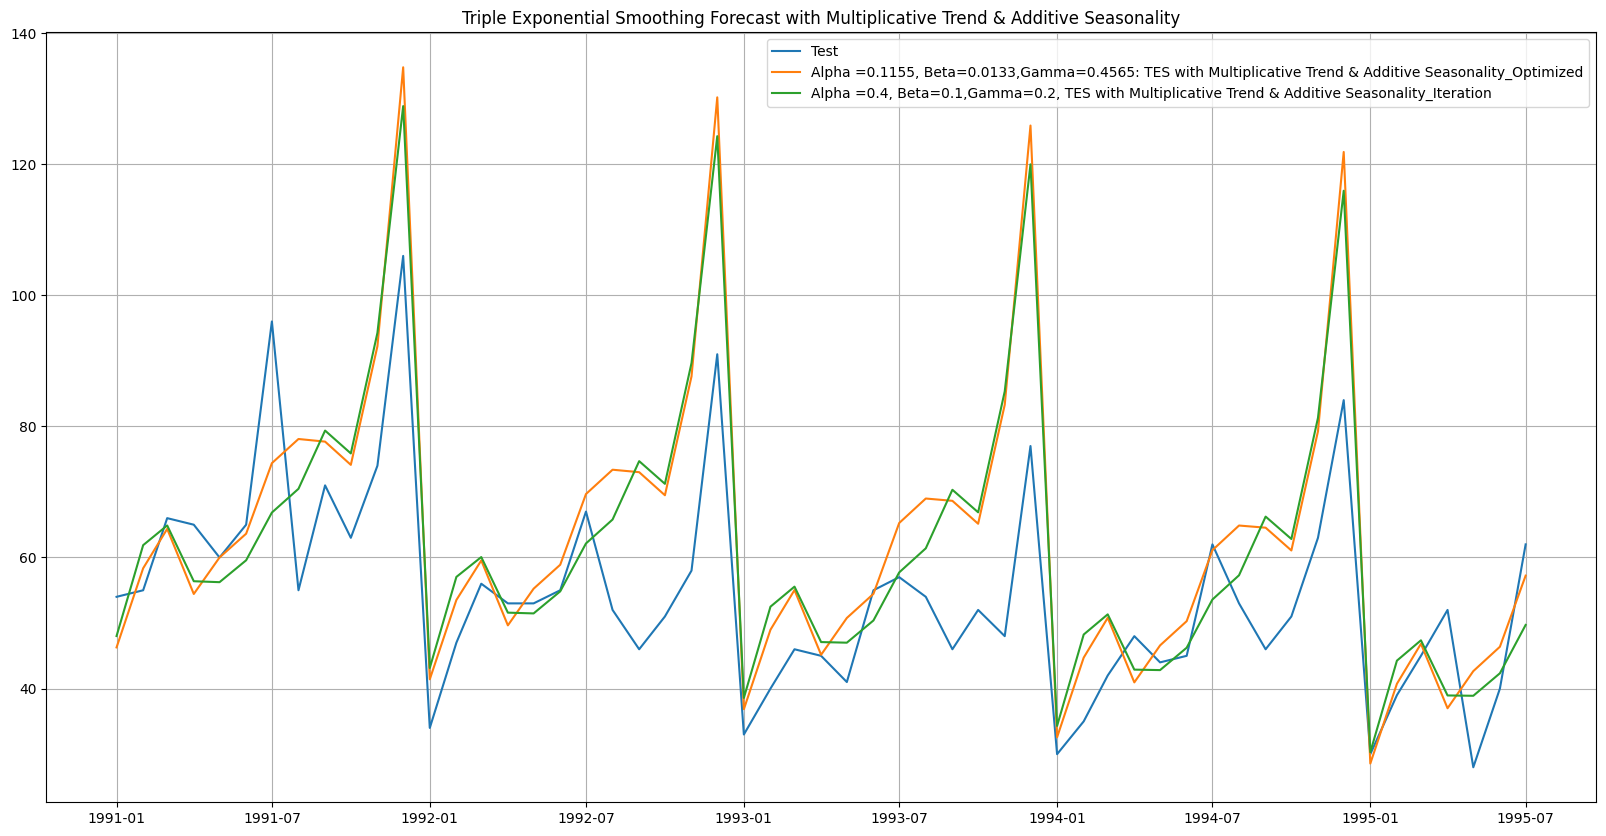

In [99]:
plt.figure(figsize=(20,10))
#plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')

plt.plot(df_test.forecast_tes_mult_add_optimized, 
         label='Alpha =0.1155, Beta=0.0133,Gamma=0.4565: TES with Multiplicative Trend & Additive Seasonality_Optimized')
plt.plot(df_test.forecast_tes_mult_add, 
         label='Alpha=0.1, Beta=0.8,Gamma=0.2,TES with Multiplicative Trend & Additive Seasonality_Iteration')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality');

In [100]:
rmse_tes_mult_add = mean_squared_error(df_test.Rose,df_test.forecast_tes_mult_add,squared=False)
rmse_tes_mult_add

15.639656402070498

In [159]:
resultsDf_15 = pd.DataFrame({'Test RMSE': [rmse_tes_mult_add]},index=['Triple Exponential Smoothing Forecast with Multiplicative Trend & Additive Seasonality Alpha=0.1, Beta=0.8,Gamma=0.2'])

resultsDf = pd.concat([resultsDf, resultsDf_15])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383
Double Exponential Smoothing Forecast               15.304860
Double Exponential Smoothing Forecast Alpha =0....  36.449278
Triple Exponential Smoothing Forecast with Addi...  14.158291
Triple Exponential Smoothing Forecast with addi...  23.028941
Triple Exponential Smoothing Forecast with Addi...  18.681118
Triple Exponential Smoothing Forecast with Addi...   9.266047
Triple Exponential Smoothing Forecast with Mult...  19.875926
Triple Exponential Smoothing Forecast with Mult...  27.221679
Triple Exponential Smoothing Forecast with Mult...  15.639656

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.


`Plot the Time Series`

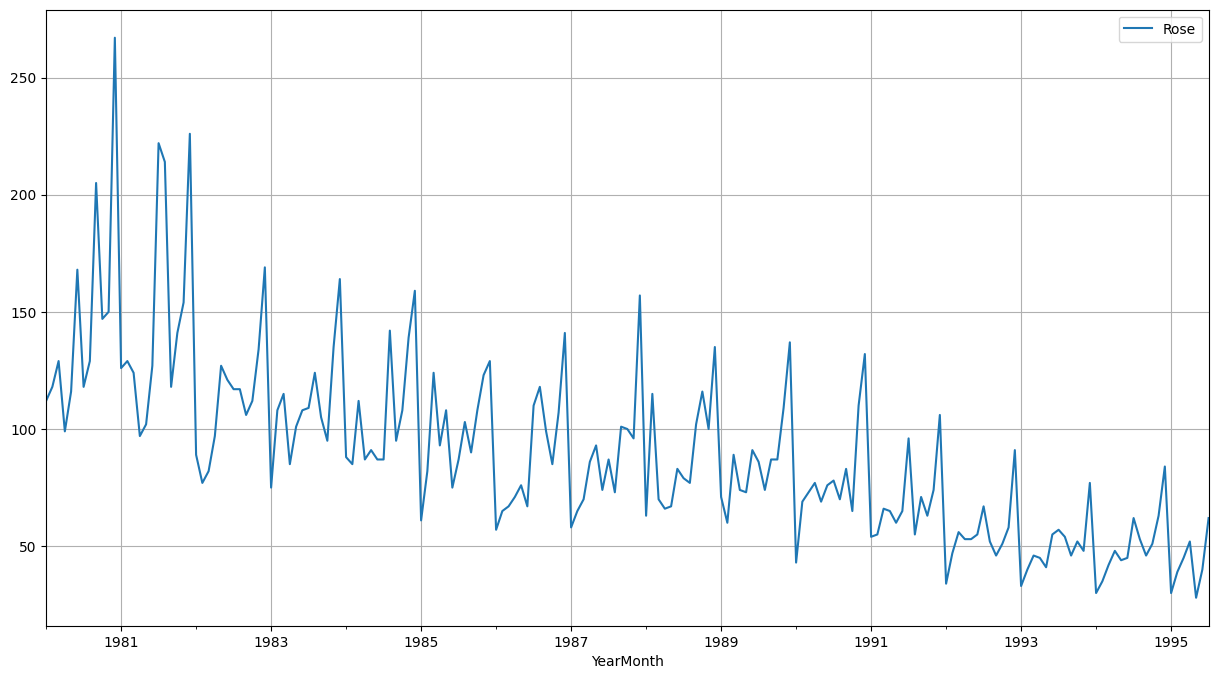

In [101]:
df.plot()
plt.grid()

In [102]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

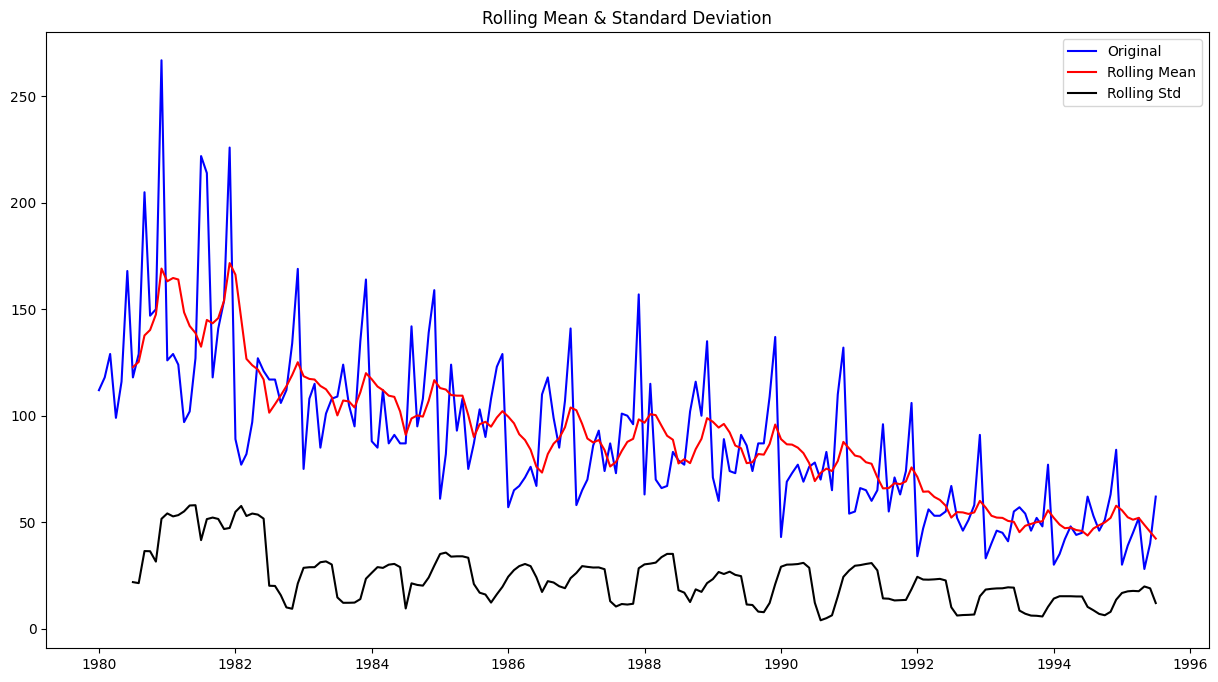

Results of Dickey-Fuller Test:
Test Statistic                  -1.887760
p-value                          0.337841
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [103]:
test_stationarity(df)

On differencing Dataset

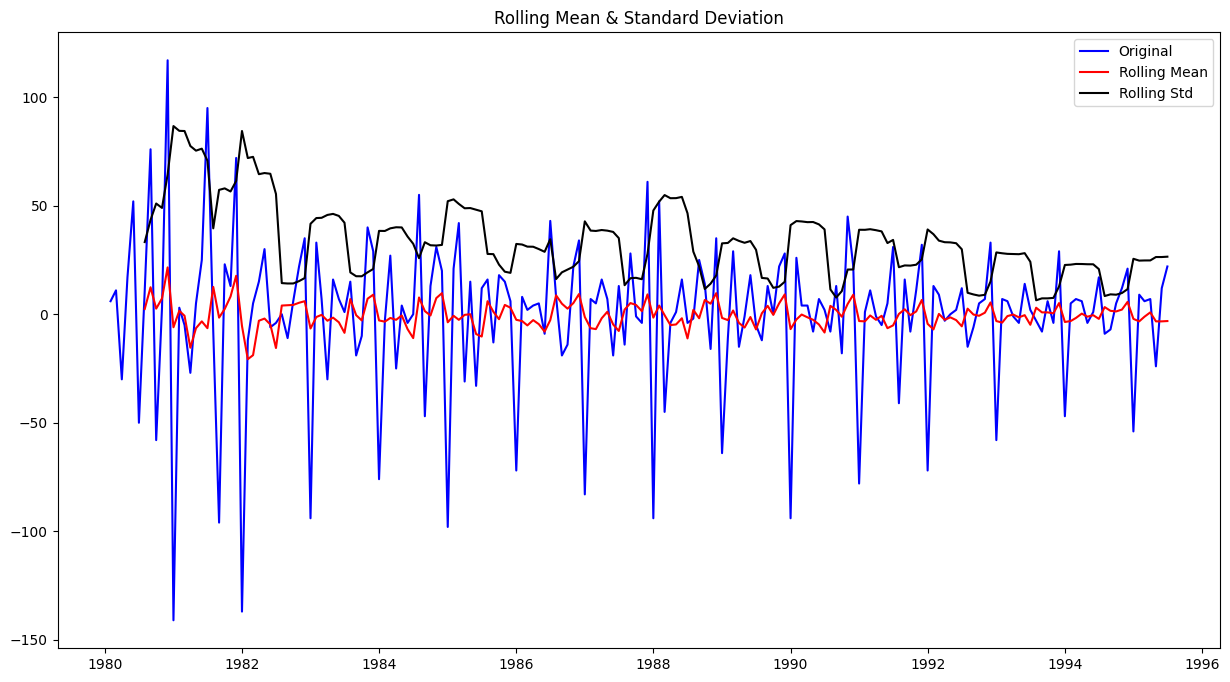

Results of Dickey-Fuller Test:
Test Statistic                -8.028518e+00
p-value                        1.987167e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [104]:
test_stationarity(df.diff().dropna())


`Plotting Differenced Time Series`

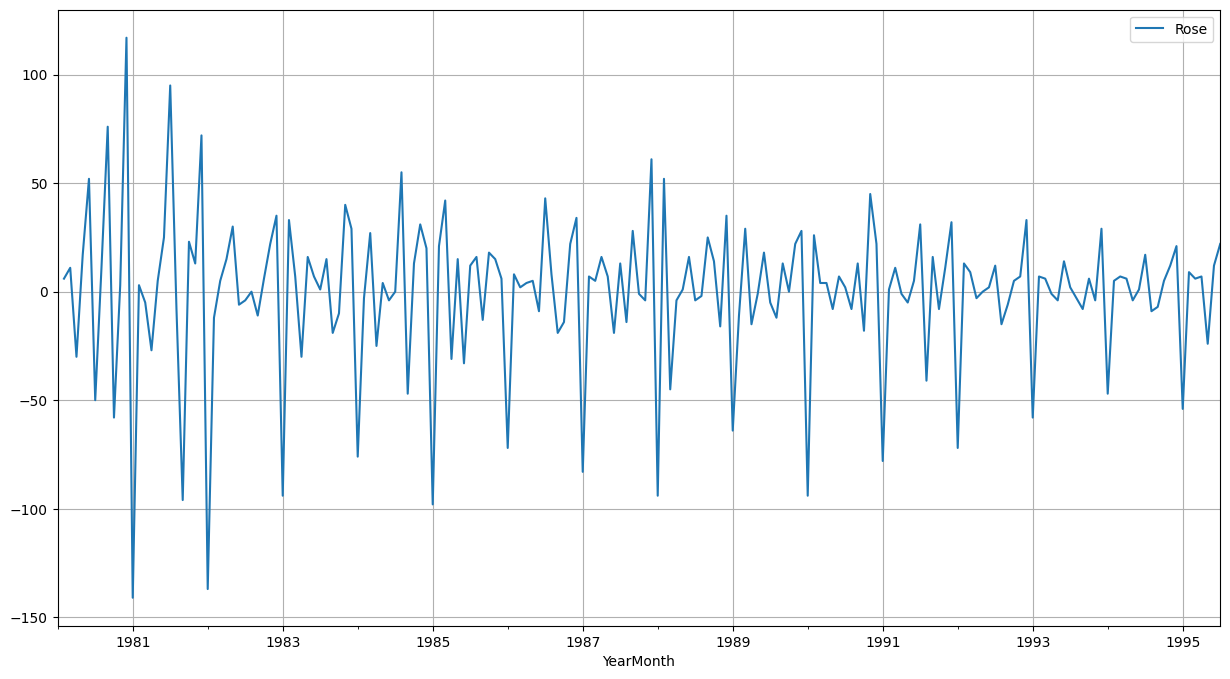

In [105]:
df.diff().plot()
plt.grid()

`Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data`

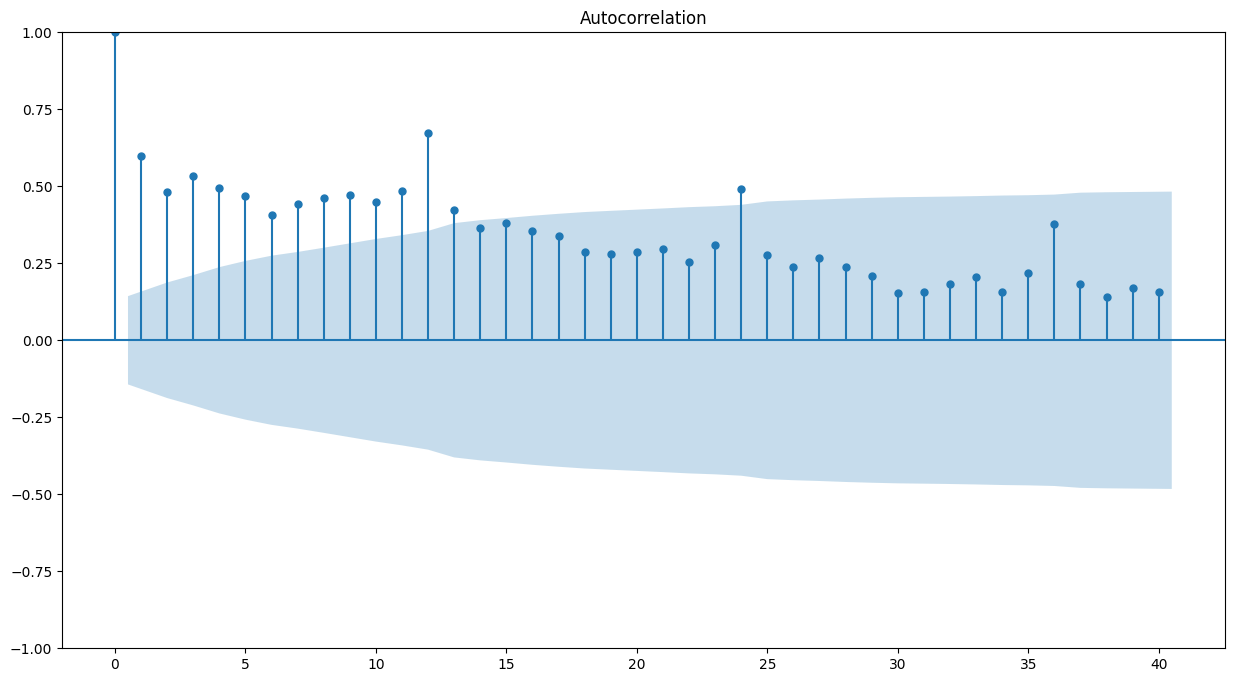

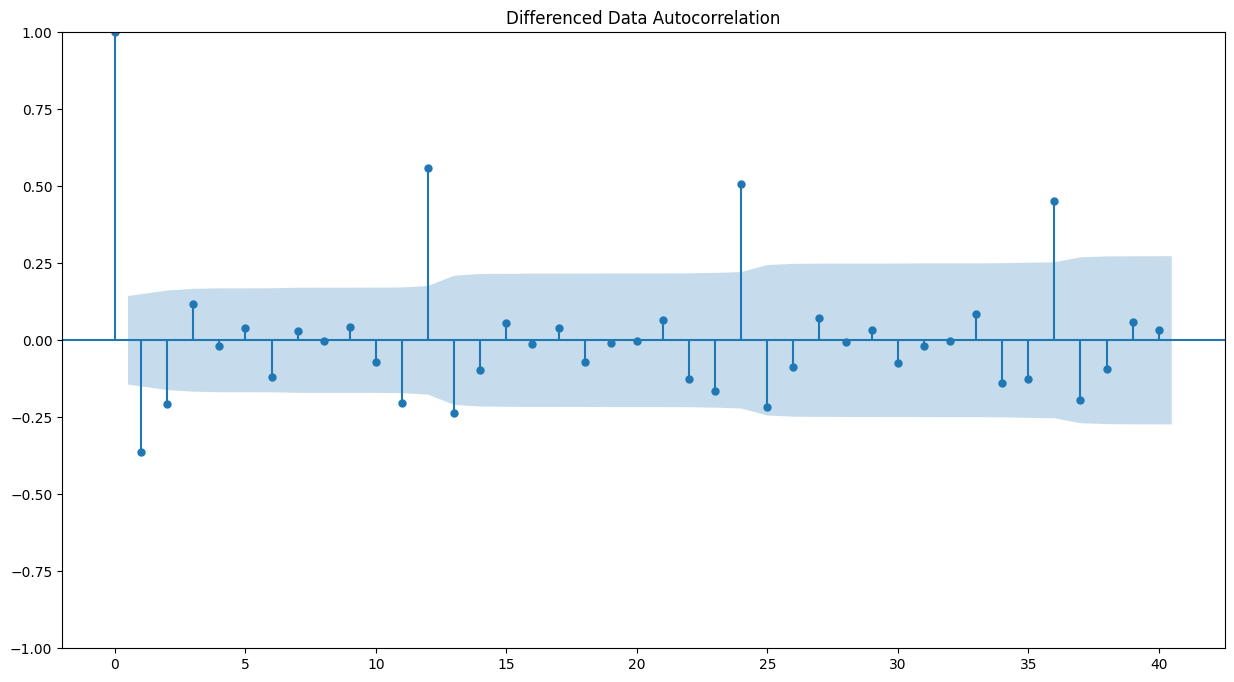

In [106]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df,alpha=0.05,lags=40);
plot_acf(df.diff().dropna(),alpha=0.05,lags=40,title='Differenced Data Autocorrelation');

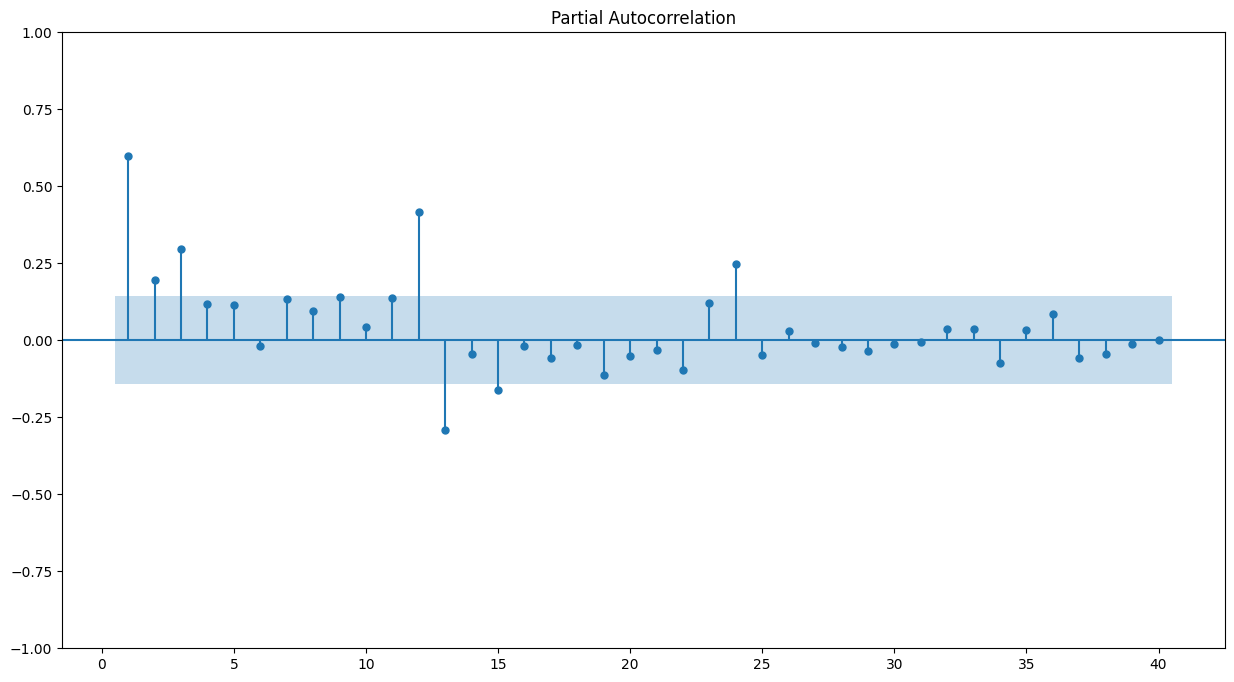

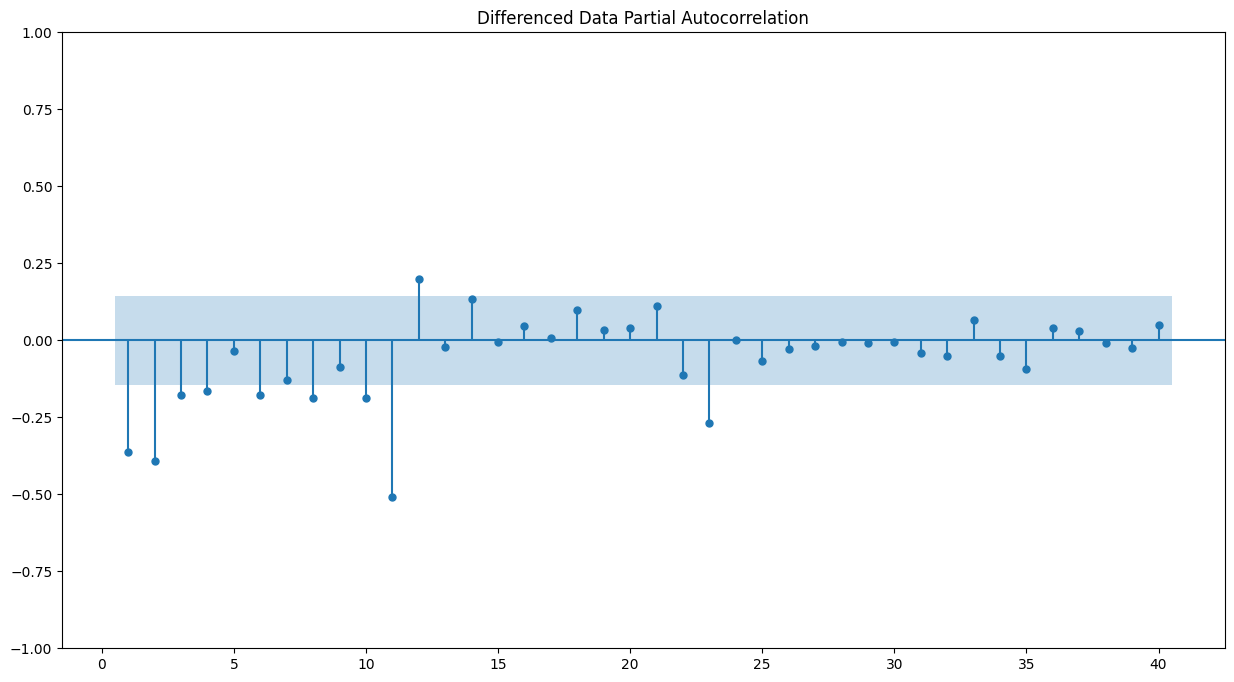

In [107]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle',lags=40);
plot_pacf(df.diff().dropna(),zero=False,alpha=0.05,method='ywmle',lags=40,
          title='Differenced Data Partial Autocorrelation');

`Check for Stationarity of Train Dataset`

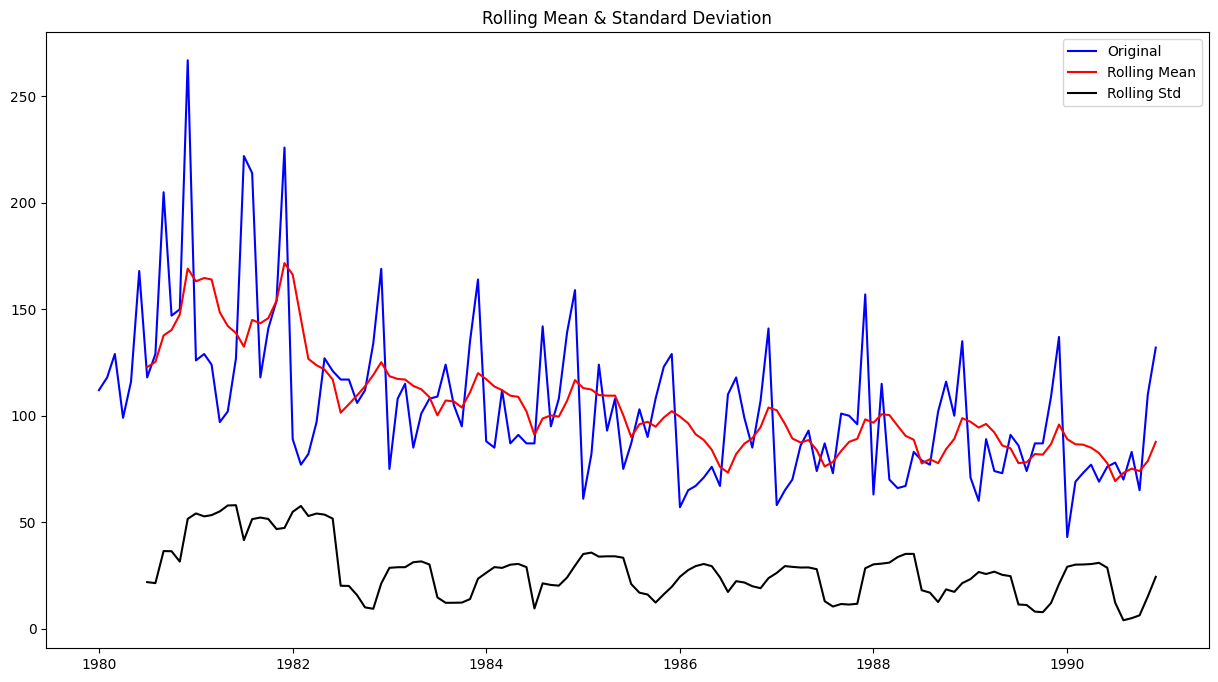

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [108]:
test_stationarity(df_train.Rose)

`On differencing Train Dataset`

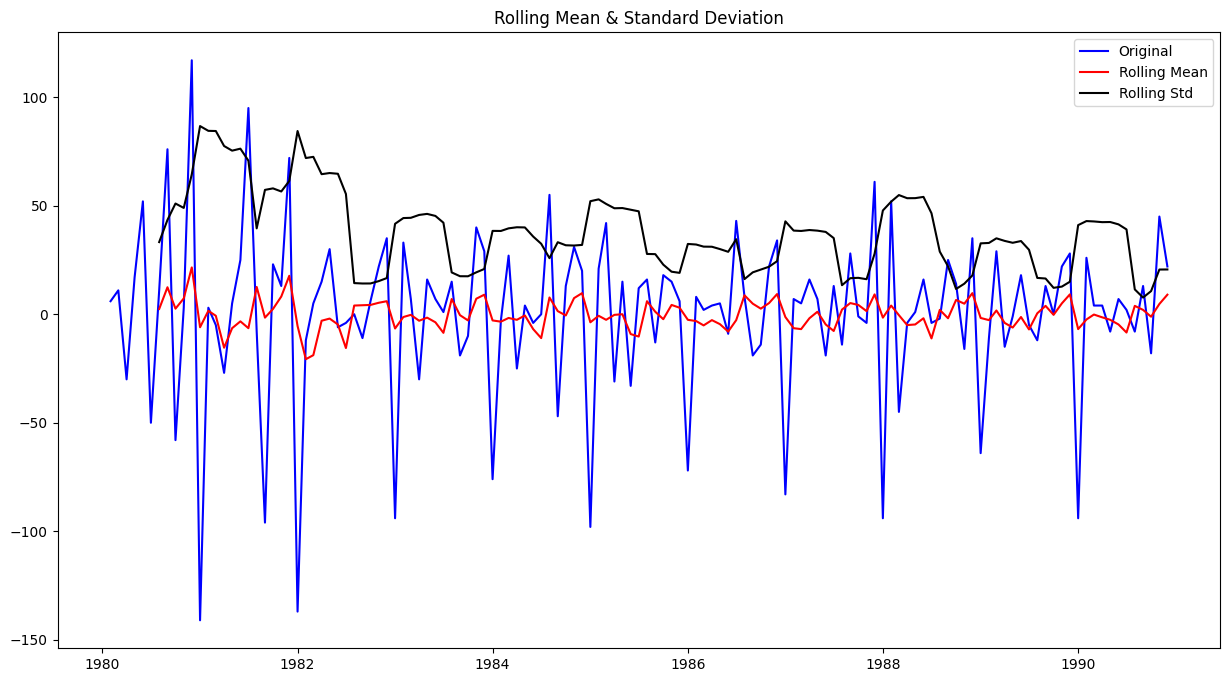

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [109]:
test_stationarity(df_train.Rose.diff().dropna())

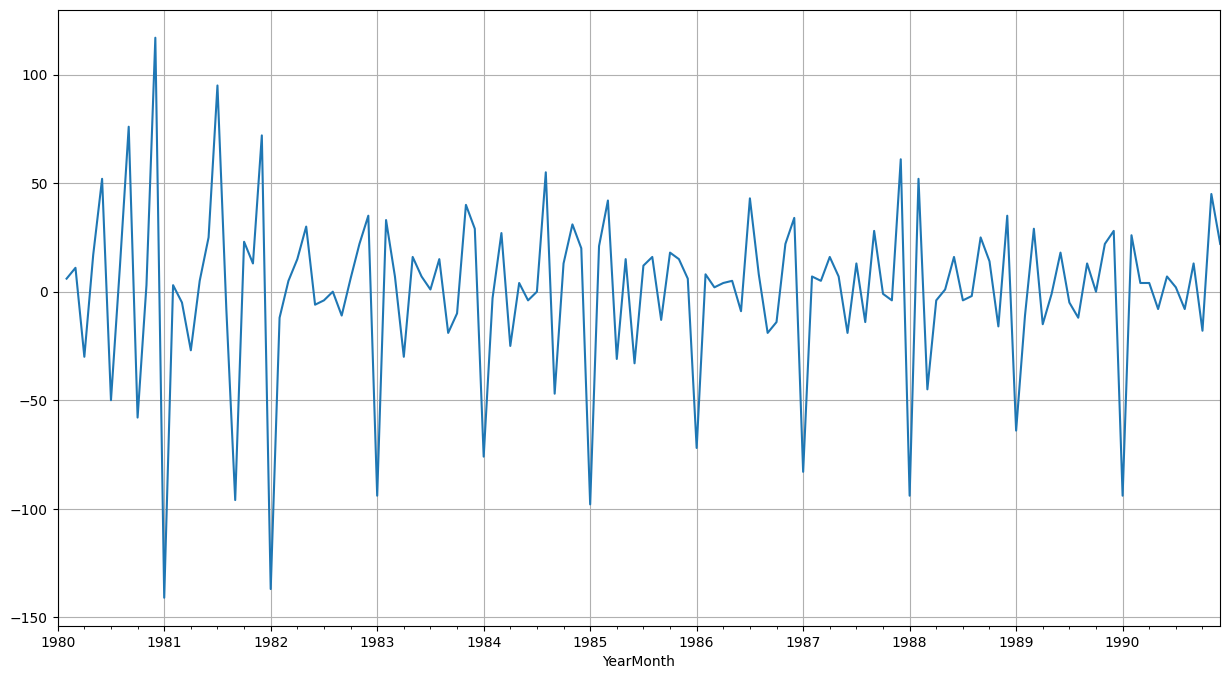

In [110]:
df_train.Rose.diff().plot()
plt.grid()

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

`ARIMA Automated Version`

In [111]:
import itertools
p=q=range(0,4)
d=range(1,2)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [112]:
for i in pdq:
    print(i, end=", ")

(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), 

In [113]:
from statsmodels.tsa.arima.model import ARIMA
ARIMA_AIC=pd.DataFrame(columns=['param','AIC'])

In [114]:
for param in pdq:
    ARIMA_model=ARIMA(df_train.Rose,order=param).fit()
    ARIMA_AIC=ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
ARIMA_AIC

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

param          AIC
0   (0, 1, 0)  1333.154673
1   (0, 1, 1)  1282.309832
2   (0, 1, 2)  1279.671529
3   (0, 1, 3)  1280.545376
4   (1, 1, 0)  1317.350311
5   (1, 1, 1)  1280.574230
6   (1, 1, 2)  1279.870723
7   (1, 1, 3)  1281.870722
8   (2, 1, 0)  1298.611034
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
11  (2, 1, 3)  1274.695127
12  (3, 1, 0)  1297.481092
13  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
15  (3, 1, 3)  1278.658004

In [115]:
ARIMA_AIC.sort_values(by='AIC').head().round(1)

param     AIC
11  (2, 1, 3)  1274.7
15  (3, 1, 3)  1278.7
2   (0, 1, 2)  1279.7
6   (1, 1, 2)  1279.9
3   (0, 1, 3)  1280.5

In [116]:
ARIMA_auto=ARIMA(df_train.Rose,order=(2, 1, 2)).fit()
ARIMA_auto.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 23 Apr 2023   AIC                           1281.871
Time:                        11:44:46   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.580      -1.154       0.646
ma.L2         -0.5984      0.430     -1.390      0.164      -1.442       0.245
sigma2       952.1601     91.424     10.415      0.000     772.973    1131.347
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                34.16
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

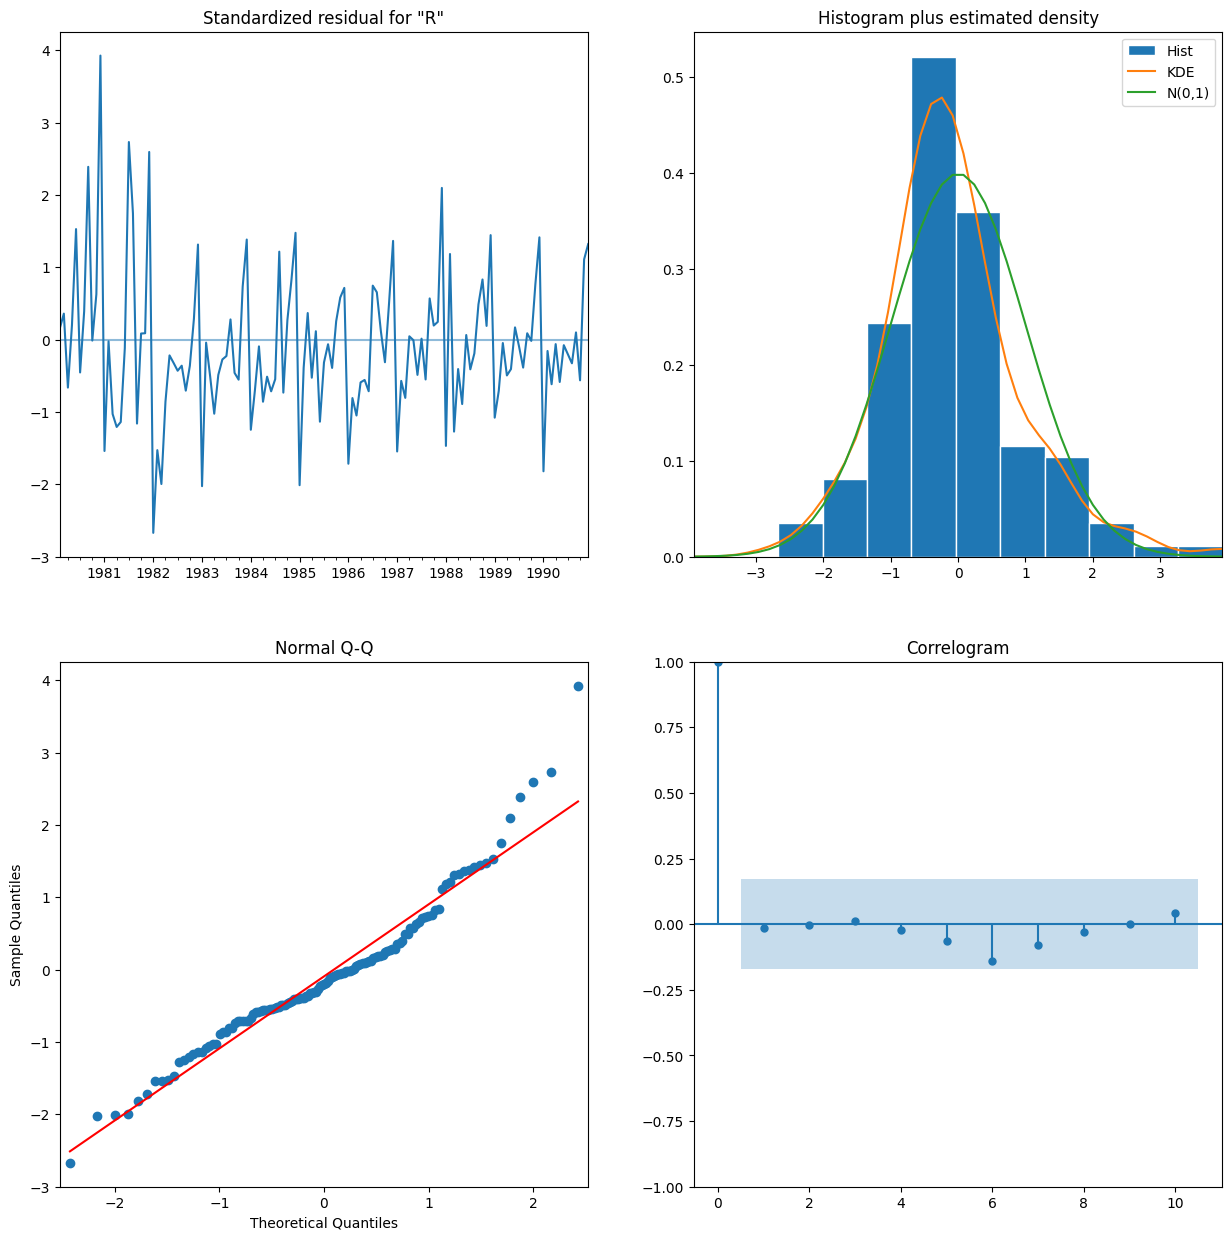

In [117]:
ARIMA_auto.plot_diagnostics(figsize=(15,15));

`Forecast on Test Dataset`

In [118]:
df_test['forecast_ARIMA_auto']=ARIMA_auto.forecast(len(df_test))
df_test[['Rose','forecast_ARIMA_auto']].head().round(3)

Rose  forecast_ARIMA_auto
YearMonth                            
1991-01-01  54.0               91.160
1991-02-01  55.0               85.315
1991-03-01  66.0               87.962
1991-04-01  65.0               86.760
1991-05-01  60.0               87.306

In [119]:
from sklearn.metrics import mean_squared_error

rmse_ARIMA_auto=mean_squared_error(df_test.Rose,df_test.forecast_ARIMA_auto,squared=False)
rmse_ARIMA_auto

36.45710588449417

In [160]:
resultsDf_16 = pd.DataFrame({'Test RMSE': [rmse_ARIMA_auto]},index=['forecast_ARIMA_auto'])

resultsDf = pd.concat([resultsDf, resultsDf_16])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383
Double Exponential Smoothing Forecast               15.304860
Double Exponential Smoothing Forecast Alpha =0....  36.449278
Triple Exponential Smoothing Forecast with Addi...  14.158291
Triple Exponential Smoothing Forecast with addi...  23.028941
Triple Exponential Smoothing Forecast with Addi...  18.681118
Triple Exponential Smoothing Forecast with Addi...   9.266047
Triple Exponential Smoothing Forecast with Mult...  19.875926
Triple Exponential Smoothing Forecast with Mult...  27.221679
Triple Exponential Smoothing Forecast with Mult...  15.639656
forecast_ARIMA_auto                                 36.457106

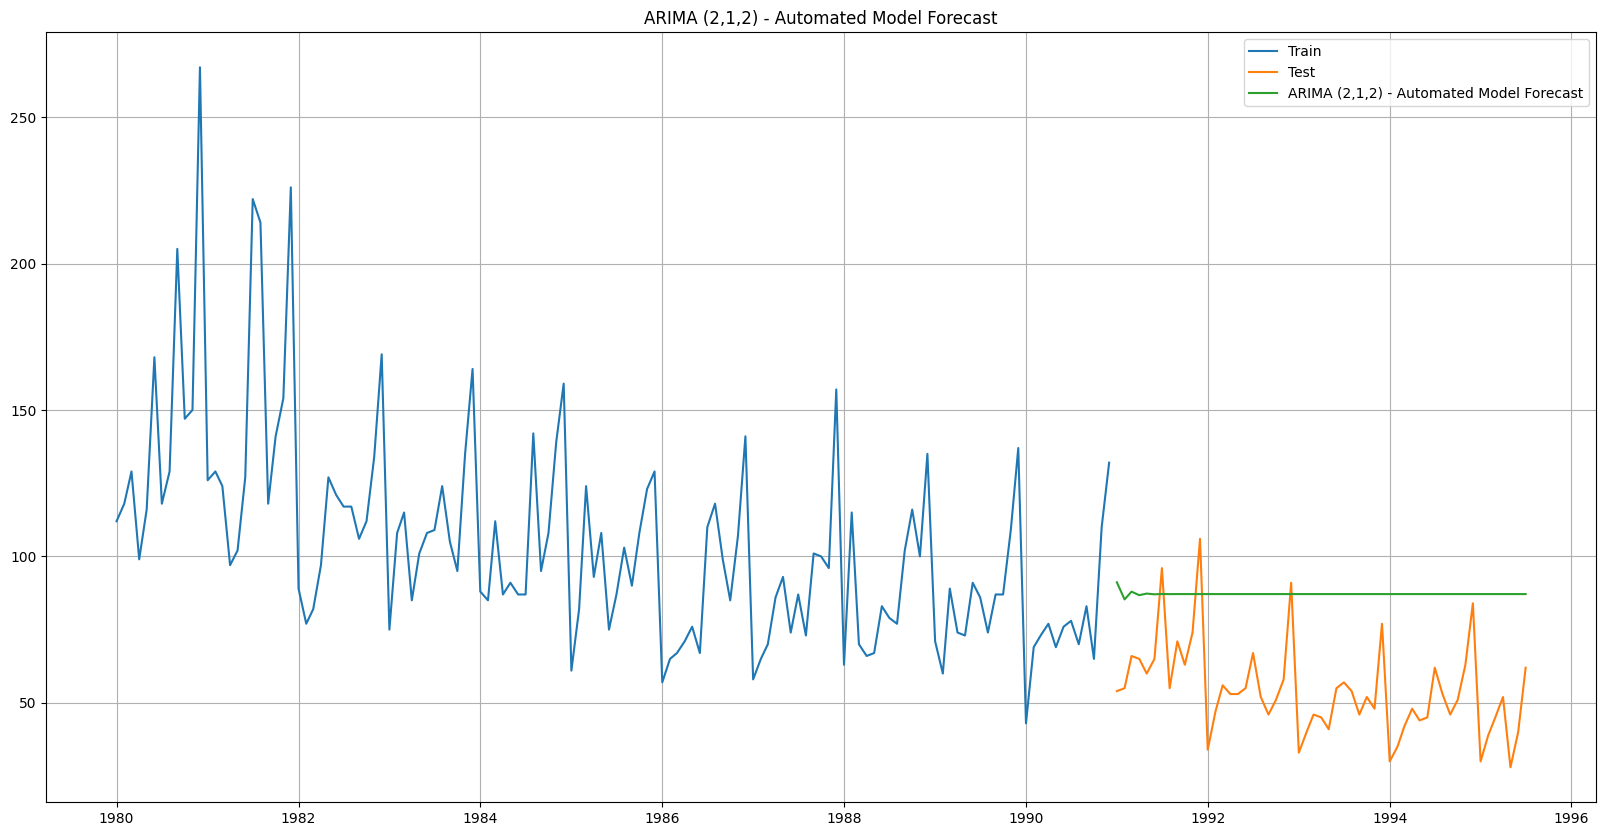

In [120]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='ARIMA (2,1,3) - Automated Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('ARIMA (2,1,3) - Automated Model Forecast');

### SARIMA - Automated Version



In [121]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,2)
pdq=list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
display(pdq)
display(PDQ)

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

[(0, 0, 0, 6),
 (0, 0, 1, 6),
 (0, 0, 2, 6),
 (0, 0, 3, 6),
 (0, 1, 0, 6),
 (0, 1, 1, 6),
 (0, 1, 2, 6),
 (0, 1, 3, 6),
 (1, 0, 0, 6),
 (1, 0, 1, 6),
 (1, 0, 2, 6),
 (1, 0, 3, 6),
 (1, 1, 0, 6),
 (1, 1, 1, 6),
 (1, 1, 2, 6),
 (1, 1, 3, 6),
 (2, 0, 0, 6),
 (2, 0, 1, 6),
 (2, 0, 2, 6),
 (2, 0, 3, 6),
 (2, 1, 0, 6),
 (2, 1, 1, 6),
 (2, 1, 2, 6),
 (2, 1, 3, 6),
 (3, 0, 0, 6),
 (3, 0, 1, 6),
 (3, 0, 2, 6),
 (3, 0, 3, 6),
 (3, 1, 0, 6),
 (3, 1, 1, 6),
 (3, 1, 2, 6),
 (3, 1, 3, 6)]

In [122]:
for i in pdq:
    print(i, end=", ")

(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 1, 3), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 1, 3), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 1, 3), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 1, 3), 

In [123]:
for i in PDQ:
    print(i, end=", ")

(0, 0, 0, 6), (0, 0, 1, 6), (0, 0, 2, 6), (0, 0, 3, 6), (0, 1, 0, 6), (0, 1, 1, 6), (0, 1, 2, 6), (0, 1, 3, 6), (1, 0, 0, 6), (1, 0, 1, 6), (1, 0, 2, 6), (1, 0, 3, 6), (1, 1, 0, 6), (1, 1, 1, 6), (1, 1, 2, 6), (1, 1, 3, 6), (2, 0, 0, 6), (2, 0, 1, 6), (2, 0, 2, 6), (2, 0, 3, 6), (2, 1, 0, 6), (2, 1, 1, 6), (2, 1, 2, 6), (2, 1, 3, 6), (3, 0, 0, 6), (3, 0, 1, 6), (3, 0, 2, 6), (3, 0, 3, 6), (3, 1, 0, 6), (3, 1, 1, 6), (3, 1, 2, 6), (3, 1, 3, 6), 

In [124]:
SARIMA_AIC = pd.DataFrame(columns=['param','param_seasonal', 'AIC'])

import statsmodels.api as sm

for i in pdq:
    for j in PDQ:
        SARIMA_model=sm.tsa.statespace.SARIMAX(df_train.Rose,order=i,seasonal_order=j,
                                              enforce_stationarity=False,enforce_invertibility=False).fit(maxiter=1000)
        SARIMA_AIC = SARIMA_AIC.append({'param':i,'param_seasonal':j ,'AIC': SARIMA_model.aic}, 
                                       ignore_index=True)
SARIMA_AIC  

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dat

param param_seasonal          AIC
0    (0, 1, 0)   (0, 0, 0, 6)  1323.965788
1    (0, 1, 0)   (0, 0, 1, 6)  1264.499626
2    (0, 1, 0)   (0, 0, 2, 6)  1144.707747
3    (0, 1, 0)   (0, 0, 3, 6)  1081.271383
4    (0, 1, 0)   (0, 1, 0, 6)  1362.652526
..         ...            ...          ...
507  (3, 1, 3)   (3, 0, 3, 6)   954.466563
508  (3, 1, 3)   (3, 1, 0, 6)   896.092155
509  (3, 1, 3)   (3, 1, 1, 6)   897.929681
510  (3, 1, 3)   (3, 1, 2, 6)   899.706490
511  (3, 1, 3)   (3, 1, 3, 6)   893.125620

[512 rows x 3 columns]

In [125]:
SARIMA_AIC.sort_values(by='AIC').head().round(1)

param param_seasonal    AIC
375  (2, 1, 3)   (2, 1, 3, 6)  889.2
503  (3, 1, 3)   (2, 1, 3, 6)  891.1
511  (3, 1, 3)   (3, 1, 3, 6)  893.1
367  (2, 1, 3)   (1, 1, 3, 6)  894.8
127  (0, 1, 3)   (3, 1, 3, 6)  894.9

In [126]:
SARIMA_auto=sm.tsa.statespace.SARIMAX(df_train.Rose,order=(2,1,3),seasonal_order=(2,1,3,6),
                                              enforce_stationarity=False,enforce_invertibility=False).fit(maxiter=1000)

SARIMA_auto.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 6)   Log Likelihood                -433.595
Date:                           Sun, 23 Apr 2023   AIC                            889.189
Time:                                   11:53:14   BIC                            918.172
Sample:                               01-01-1980   HQIC                           900.928
                                    - 12-01-1990                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5746      0.023     25.059      0.000       0.530       0.620
ar.L2         -0.9163      0.021    -43.475      0.000      -0.958      -0.875
ma.L1         -1.4571    155.859     -0.009      0.993    -306.936     304.022
ma.L2          1.5182    636.951      0.002      0.998   -1246.884    1249.920
ma.L3         -0.8408    425.368     -0.002      0.998    -834.547     832.866
ar.S.L6       -0.4345      0.106     -4.088      0.000      -0.643      -0.226
ar.S.L12       0.4837      0.102      4.741      0.000       0.284       0.684
ma.S.L6       -1.6622     79.404     -0.021      0.983    -157.292     153.968
ma.S.L12      -1.0720    211.531     -0.005      0.996    -415.666     413.521
ma.S.L18       1.5908    126.462      0.013      0.990    -246.270     249.452
sigma2        68.5368   3.56e+04      0.002      0.998   -6.98e+04    6.99e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.81
Prob(Q):                              0.86   Prob(JB):                         0.05
Heteroskedasticity (H):               0.45   Skew:                             0.56
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

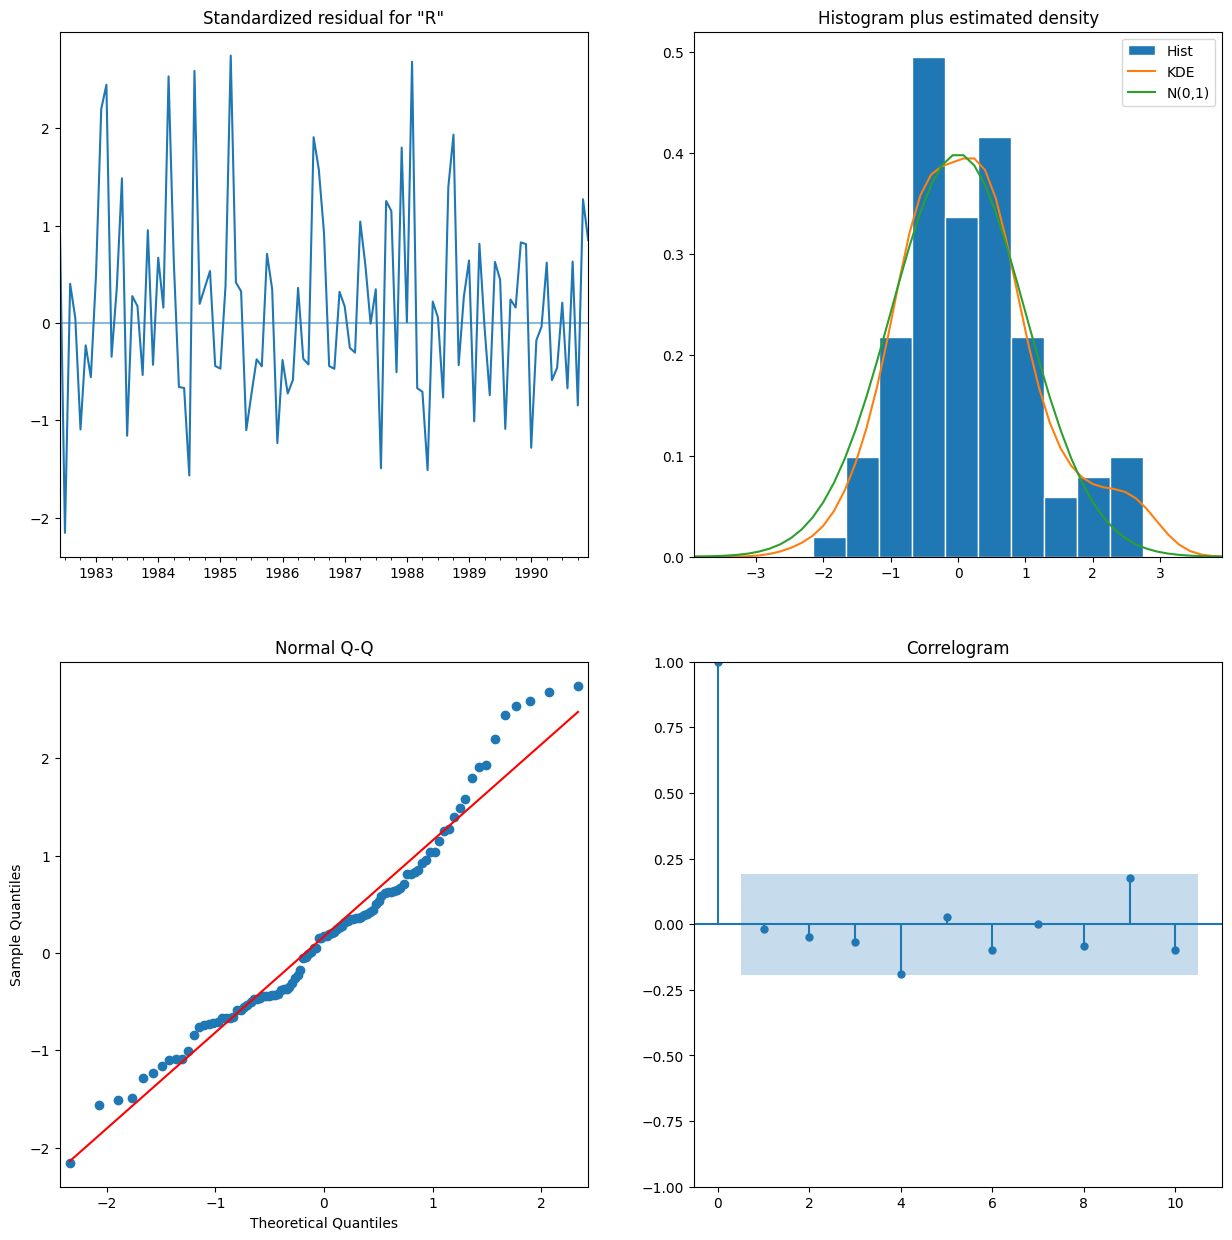

In [127]:
SARIMA_auto.plot_diagnostics(figsize=(15,15));

`Prediction on Test Dataset`

In [128]:
df_test['forecast_SARIMA_auto']=SARIMA_auto.forecast(steps=len(df_test))

df_test[['Rose','forecast_ARIMA_auto','forecast_SARIMA_auto']].head(10).round(1)

Rose  forecast_ARIMA_auto  forecast_SARIMA_auto
YearMonth                                                  
1991-01-01  54.0                 91.2                  54.9
1991-02-01  55.0                 85.3                  64.0
1991-03-01  66.0                 88.0                  71.8
1991-04-01  65.0                 86.8                  69.0
1991-05-01  60.0                 87.3                  77.0
1991-06-01  65.0                 87.1                  80.3
1991-07-01  96.0                 87.2                  68.5
1991-08-01  55.0                 87.1                  77.2
1991-09-01  71.0                 87.1                  76.5
1991-10-01  63.0                 87.1                  76.5

In [129]:
rmse_SARIMA_auto=mean_squared_error(df_test.Rose,df_test.forecast_SARIMA_auto,squared=False)
rmse_SARIMA_auto

16.673049661101743

In [161]:
resultsDf_17 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_auto]},index=['forecast_SARIMA_auto'])

resultsDf = pd.concat([resultsDf, resultsDf_17])
resultsDf

Test RMSE
Linear Regression                                   15.303047
Naive Forecast                                      79.281547
Simple Average                                      53.029519
Simple Exponential Smoothing Forecast               36.381645
Simple Exponential Smoothing Forecast with alph...  36.413383
Double Exponential Smoothing Forecast               15.304860
Double Exponential Smoothing Forecast Alpha =0....  36.449278
Triple Exponential Smoothing Forecast with Addi...  14.158291
Triple Exponential Smoothing Forecast with addi...  23.028941
Triple Exponential Smoothing Forecast with Addi...  18.681118
Triple Exponential Smoothing Forecast with Addi...   9.266047
Triple Exponential Smoothing Forecast with Mult...  19.875926
Triple Exponential Smoothing Forecast with Mult...  27.221679
Triple Exponential Smoothing Forecast with Mult...  15.639656
forecast_ARIMA_auto                                 36.457106
forecast_SARIMA_auto                                16.673050

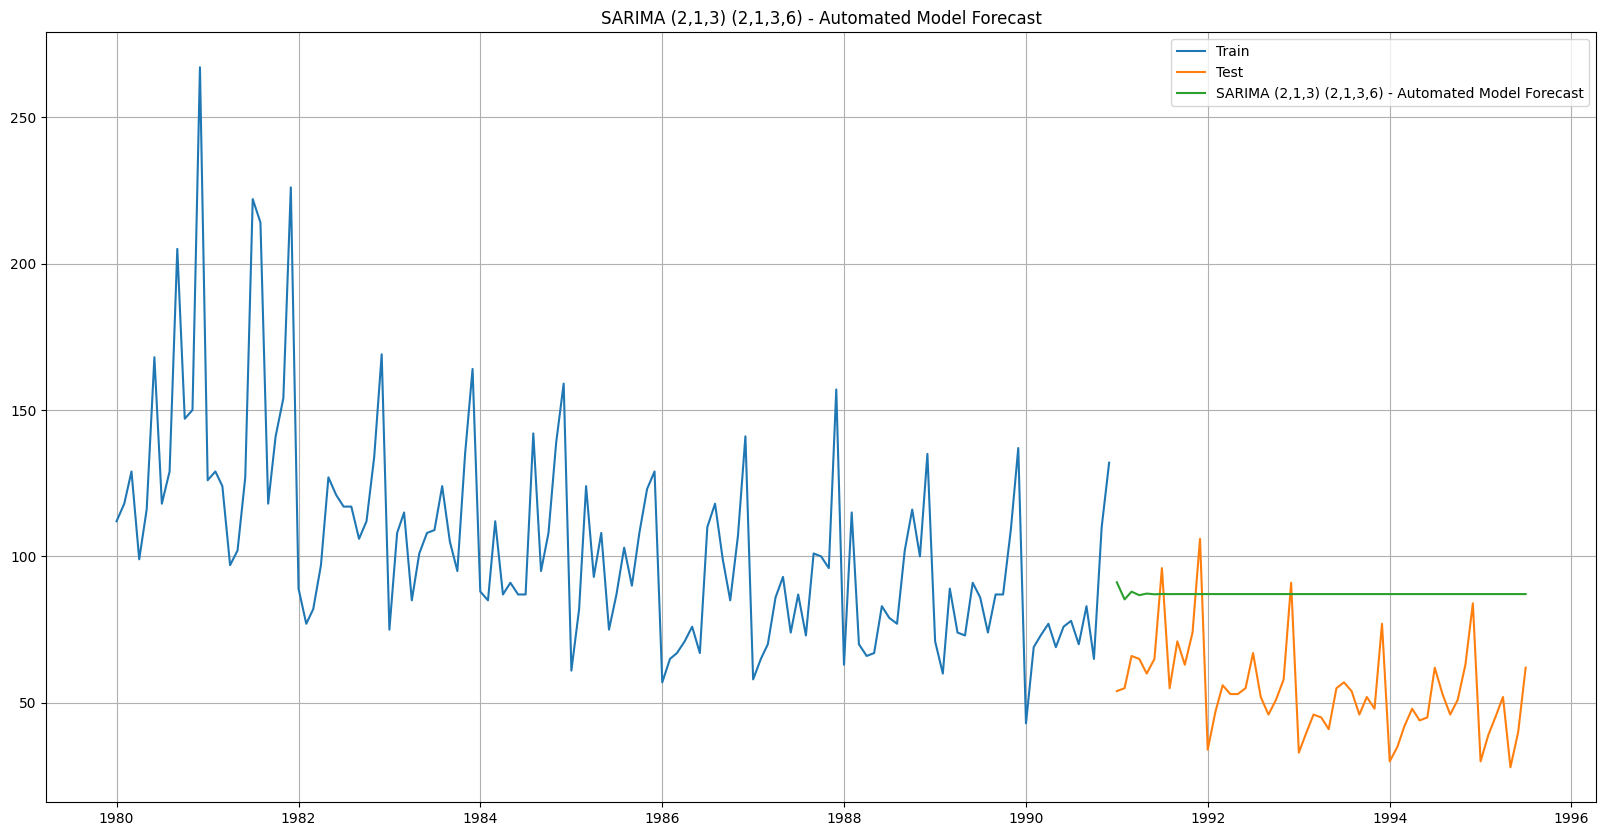

In [130]:
plt.figure(figsize=(20,10))
plt.plot(df_train.Rose, label='Train')
plt.plot(df_test.Rose, label='Test')
plt.plot(df_test.forecast_ARIMA_auto, 
         label='SARIMA (2,1,3) (2,1,3,6) - Automated Model Forecast')
plt.legend(loc='best')
plt.grid()
plt.title('SARIMA (2,1,3) (2,1,3,6) - Automated Model Forecast');

## 7. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data

In [183]:
resultsDf.sort_values(by='Test RMSE').round(3)

Test RMSE
Triple Exponential Smoothing Forecast with Mult...      9.053
Triple Exponential Smoothing Forecast with Addi...      9.266
Triple Exponential Smoothing Forecast with Addi...     14.158
Linear Regression                                      15.303
Double Exponential Smoothing Forecast                  15.305
Triple Exponential Smoothing Forecast with Mult...     15.640
forecast_SARIMA_auto                                   16.673
Triple Exponential Smoothing Forecast with Addi...     18.681
Triple Exponential Smoothing Forecast with Mult...     19.876
Triple Exponential Smoothing Forecast with Mult...     19.876
Triple Exponential Smoothing Forecast with addi...     23.029
Triple Exponential Smoothing Forecast with Mult...     27.222
Simple Exponential Smoothing Forecast                  36.382
Simple Exponential Smoothing Forecast with alph...     36.413
Double Exponential Smoothing Forecast Alpha =0....     36.449
forecast_ARIMA_auto                                    36.457
Simple Average                                         53.030
Naive Forecast                                         79.282

## 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Full Model - Triple Exponential Smoothing with Multiplicative Trend and Multiplicative Seasonality with Parameters as Alpha=0.2,Beta=0.7 and Gamma=0.2.

In [163]:
fullmodel = ExponentialSmoothing(df.Rose,trend='additive',seasonal='multiplicative').fit(smoothing_level=0.4,
                                                                 smoothing_trend=0.1,
                                                                 smoothing_seasonal=0.2)
rmse_fullmodel = mean_squared_error(df.Rose,fullmodel.fittedvalues,squared=False)
rmse_fullmodel

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


18.904740743926144

In [164]:
# Getting the predictions for the same number of times stamps that are present in the test data
forecast_fullmodel = fullmodel.forecast(steps=12)

In [165]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,10

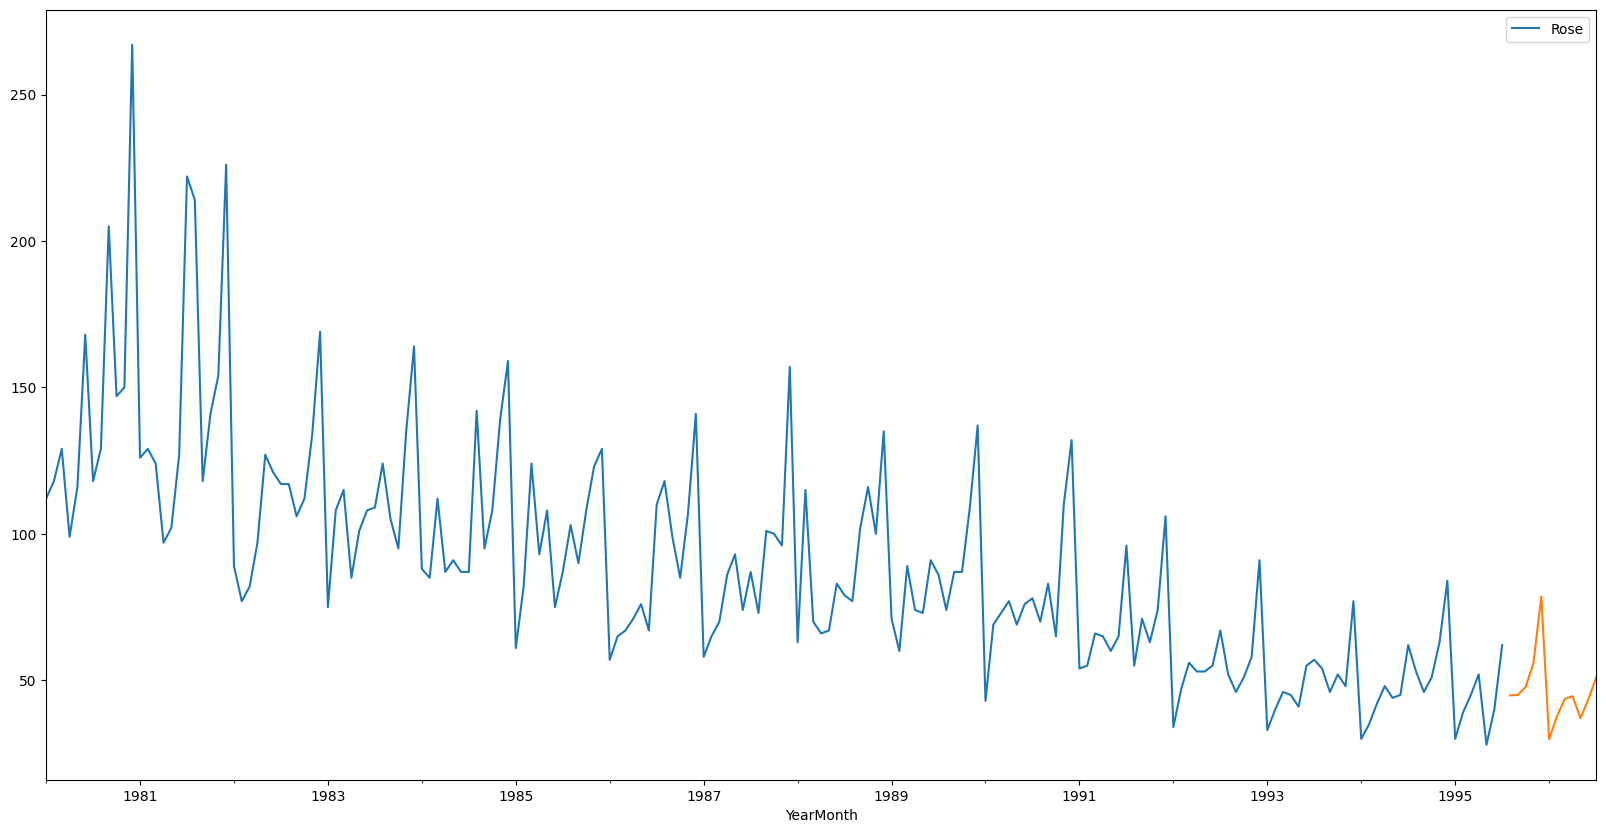

In [166]:
df.plot();
forecast_fullmodel.plot();

In [167]:
fullmodel.resid

YearMonth
1980-01-01     2.063174
1980-02-01    -2.259842
1980-03-01    -0.002678
1980-04-01    -5.922771
1980-05-01    -1.676736
                ...    
1995-03-01    -0.548101
1995-04-01     7.397102
1995-05-01   -16.352297
1995-06-01    -0.673730
1995-07-01    15.484684
Length: 187, dtype: float64

In [168]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
forecast_df = pd.DataFrame({'lower_CI':forecast_fullmodel - 1.96*np.std(fullmodel.resid,ddof=1),
                          'Forecast':forecast_fullmodel,
                          'upper_ci': forecast_fullmodel + 1.96*np.std(fullmodel.resid,ddof=1)})
forecast_df.round(1)

lower_CI  Forecast  upper_ci
1995-08-01       7.7      44.8      82.0
1995-09-01       7.8      45.0      82.1
1995-10-01      10.6      47.7      84.9
1995-11-01      18.8      55.9      93.1
1995-12-01      41.4      78.6     115.7
1996-01-01      -7.3      29.9      67.0
1996-02-01       0.6      37.7      74.8
1996-03-01       6.5      43.7      80.8
1996-04-01       7.4      44.6      81.7
1996-05-01      -0.1      37.1      74.2
1996-06-01       6.3      43.5      80.6
1996-07-01      13.7      50.9      88.0

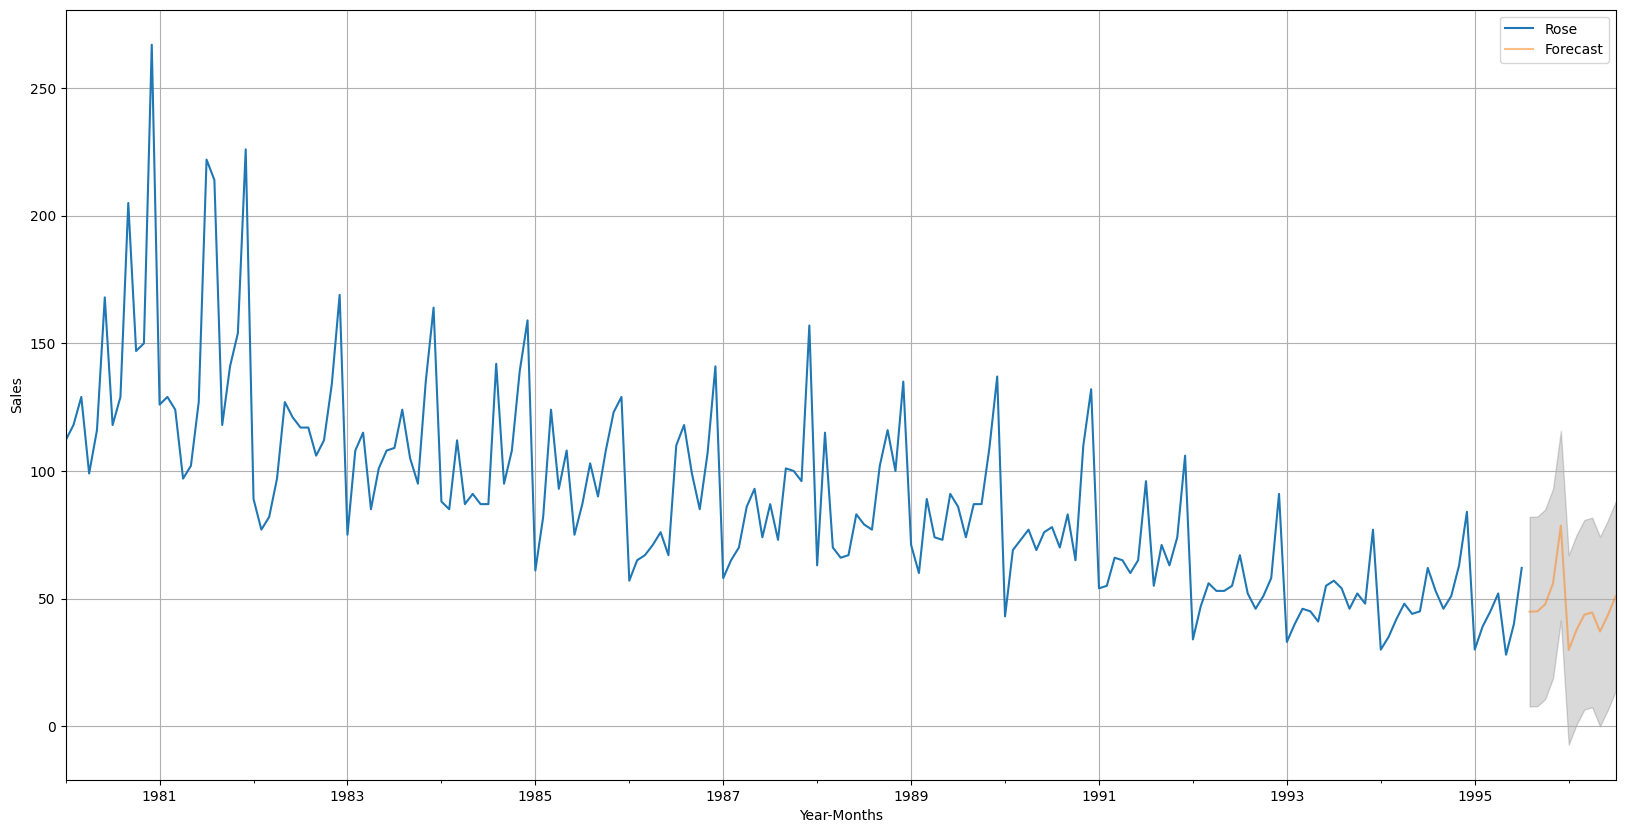

In [169]:
# plot the forecast along with the confidence band
axis = df.plot(label='Actual', figsize=(20,10))
forecast_df['Forecast'].plot(ax=axis,label='Forecast',alpha=0.5)
axis.fill_between(forecast_df.index, forecast_df['lower_CI'], forecast_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

## 9. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Best model is the triple exponential smoothing with additive trend and multiplicative seasonality with the parameters with smoothing_level=0.2,smoothing_trend=0.7,smoothing_seasonal	

RMSE is 9.05

Total wine sales follows a similar downwards pattern overall

Sales of wine is highest during the month of december

Sales of wine is expected to have few outlier

Sales increase gradually from aug to dec


Measures to increase sales:  During peak season maximum stock should be available for more sales

Find out the reason why sales is less in other months

Since the trend is downwards action should be taken to improve some aspects to improve sales